In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
import keras
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
# No module named 'tensorflow'
"""
Data description: 
Gas turbine (GT1) 
Generator Watts Max Selected {Avg}
Exhaust Temp Median Corrected By Average {Avg}
Compressor Inlet Temperature {Avg}
IGV angle in deg {Avg}
Compressor Discharge Press Max Select {Avg}
Compressor Discharge Temperature {Avg}
"""
def start():
    return None

In [2]:
# read dataset from the file
filename = 'interview data.xlsx'
df = pd.read_excel(filename)
# Drop TimeStamp
df = df.drop(['TimeStamp'], axis=1)
# Five independent Variables
med_exh_tem = df['GT1 Exhaust Temp Median Corrected By Average {Avg}']
IGV_ang = df['GT1 IGV angle in deg {Avg}']
com_disch_pre_max = df['GT1 Compressor Discharge Press Max Select {Avg}']
com_inlet_tem = df['GT1 Compressor Inlet Temperature {Avg}']
com_disch_tem = df['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat = df['GT1 Generator Watts Max Selected {Avg}']

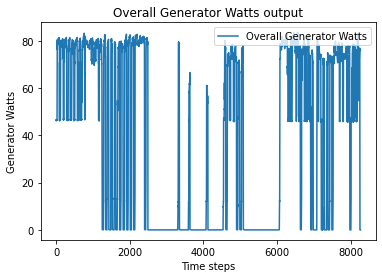

In [3]:
# plot the dataset (GT1 Generator Watts Max Selected {Avg})
plt.plot(gen_max_wat,label = 'Overall Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.show()

In [4]:
# There are some output = 0, turbine may be broken, find the most related variable.(changed a lot)
sel_data = df[df['GT1 Generator Watts Max Selected {Avg}'] < 1]
print(sel_data.shape)

(3754, 6)


In [5]:
# Get the pearson correlation between each other
pearsoncorr0 = sel_data.corr(method='pearson')
pd.set_option('display.max_columns', 6)
print(pearsoncorr0)

                                                    GT1 Generator Watts Max Selected {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                            1.000000   
GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.523754   
GT1 Compressor Inlet Temperature {Avg}                                            0.248728   
GT1 IGV angle in deg {Avg}                                                        0.148271   
GT1 Compressor Discharge Press Max Select {Avg}                                   0.134102   
GT1 Compressor Discharge Temperature {Avg}                                        0.488317   

                                                    GT1 Exhaust Temp Median Corrected By Average {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                                       0.523754    
GT1 Exhaust Temp Median Corrected By Average {Avg}                                           1.000000    
GT1 Compressor Inlet Te

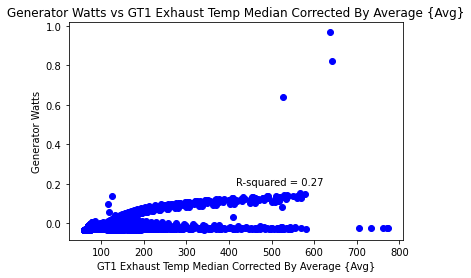

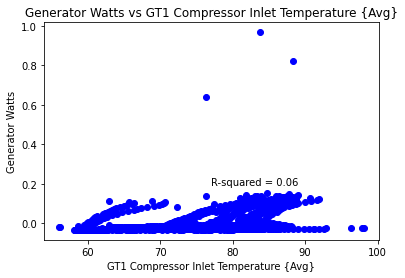

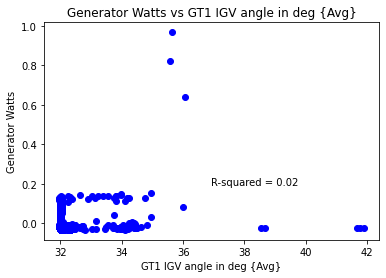

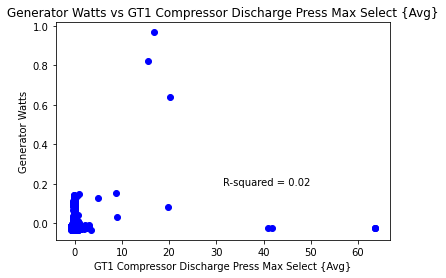

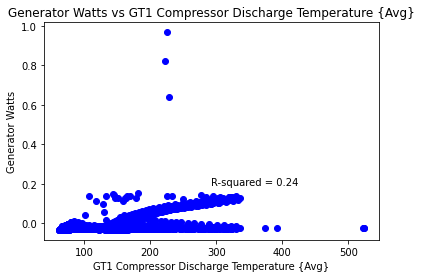

In [6]:
# Analyze the selected dataset:
# Five independent Variables
med_exh_tem0 = sel_data['GT1 Exhaust Temp Median Corrected By Average {Avg}']
com_inlet_tem0 = sel_data['GT1 Compressor Inlet Temperature {Avg}']
IGV_ang0 = sel_data['GT1 IGV angle in deg {Avg}']
com_disch_pre_max0 = sel_data['GT1 Compressor Discharge Press Max Select {Avg}']
com_disch_tem0 = sel_data['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat0 = sel_data['GT1 Generator Watts Max Selected {Avg}']

# calculate R square
# Create bars and choose color
name = []
new_vars = [med_exh_tem0, com_inlet_tem0, IGV_ang0, com_disch_pre_max0, com_disch_tem0]
for col in sel_data.columns:
    name.append([col])
len_var = len(new_vars)
for i in range(len_var):
    plt.plot(new_vars[i], gen_max_wat0, 'o', color='blue')
    # Add title and axis names
    plt.title('Generator Watts vs {}'.format(name[i+1][0]))
    plt.xlabel('{}'.format(name[i+1][0]))
    plt.ylabel('Generator Watts')
    corr_matrix = np.corrcoef(new_vars[i], gen_max_wat0)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    plt.text(0.5, 0.25, 'R-squared = %0.2f' % R_sq, transform=plt.gca().transAxes)
    plt.show()

In [7]:
# For variable: 'GT1 Compressor Discharge Press Max Select {Avg}'
# , most of the experimental data is concentrated in the lower left corner (0-5)
# For variable: ''GT1 IGV angle in deg {Avg}''
# , most of the experimental data is concentrated in the lower left corner (32-35)
# Use these two variable to predict the output is 0
def analyze():
    return None

In [15]:
# Create more variable based on the variables provide
# Difference between two consecutive numbers, usually, sudden changes may lead to failure accident, 
# decrease the Productivity
# Because the value change for each of the variables will certainly affect gas turbine performance, 
# like Compressor Inlet temperature suddenly change a lot
name_difference = ['med_exh_tem', 'com_inlet_tem', 'IGV_ang', 'com_disch_pre_max', 'com_disch_tem']
vars = [med_exh_tem, com_inlet_tem, IGV_ang, com_disch_pre_max, com_disch_tem]
for i in range(len(vars)):
    var = vars[i]
    df[name_difference[i] + '_difference'] = var - var.shift(1)

# Average between three consecutive numbers, two will overlap
# Avoid some sudden changes that lead to inaccurate data
for i in range(len(vars)):
    var = vars[i]
    df[name_difference[i] + '_average'] = (var.shift(1) + var.shift(2) + var)/3

In [8]:
# The first two rows include None value 
df = df.dropna()
print(df.shape)

(8260, 6)


In [ ]:
# create new dataset
new_vars = [med_exh_tem, com_inlet_tem, IGV_ang, com_disch_pre_max, com_disch_tem]

In [17]:
# Dropped two rows compare with the original dataset
med_exh_tem_dif = df['med_exh_tem_difference']
com_inlet_tem_dif = df['com_inlet_tem_difference']
IGV_ang_dif = df['IGV_ang_difference']
com_disch_pre_max_dif = df['com_disch_pre_max_difference']
com_disch_tem_dif = df['com_disch_tem_difference']

med_exh_tem_ave = df['med_exh_tem_average']
com_inlet_tem_ave = df['com_inlet_tem_average']
IGV_ang_ave = df['IGV_ang_average']
com_disch_pre_max_ave = df['com_disch_pre_max_average']
com_disch_tem_ave = df['com_disch_tem_average']

med_exh_tem = df['GT1 Exhaust Temp Median Corrected By Average {Avg}']
com_inlet_tem = df['GT1 Compressor Inlet Temperature {Avg}']
IGV_ang = df['GT1 IGV angle in deg {Avg}']
com_disch_pre_max = df['GT1 Compressor Discharge Press Max Select {Avg}']
com_disch_tem = df['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat = df['GT1 Generator Watts Max Selected {Avg}']

# create new dataset
new_vars = [med_exh_tem, com_inlet_tem, IGV_ang, com_disch_pre_max, com_disch_tem,
            med_exh_tem_dif, com_inlet_tem_dif, IGV_ang_dif, com_disch_pre_max_dif, com_disch_tem_dif,
            med_exh_tem_ave, com_inlet_tem_ave, IGV_ang_ave, com_disch_pre_max_ave, com_disch_tem_ave
            ]

In [18]:
# Now, there are 15 independent Variables and 1 dependent variable
# Get the pearson correlation between each other
pearsoncorr = df.corr(method='pearson')
pd.set_option('display.max_columns', 20)
print(pearsoncorr)

                                                    GT1 Generator Watts Max Selected {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                            1.000000   
GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.934648   
GT1 Compressor Inlet Temperature {Avg}                                            0.081964   
GT1 IGV angle in deg {Avg}                                                        0.993491   
GT1 Compressor Discharge Press Max Select {Avg}                                   0.990797   
GT1 Compressor Discharge Temperature {Avg}                                        0.934783   
med_exh_tem_difference                                                            0.014318   
com_inlet_tem_difference                                                         -0.053145   
IGV_ang_difference                                                                0.052717   
com_disch_pre_max_difference                                

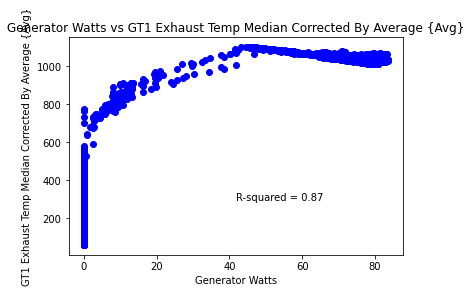

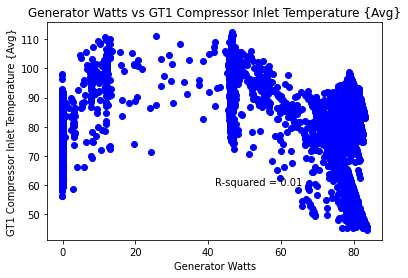

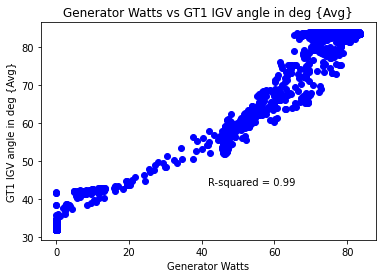

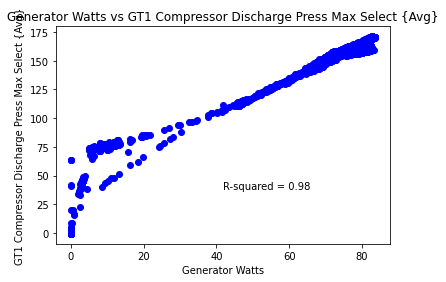

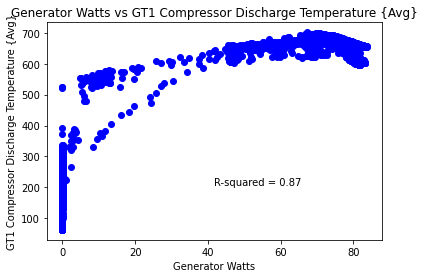

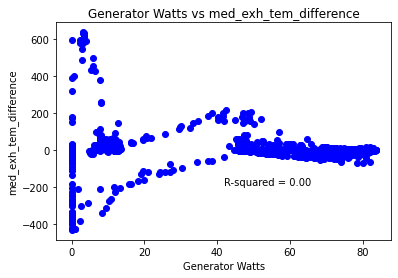

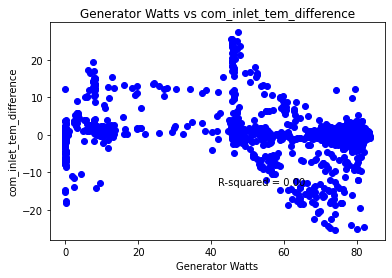

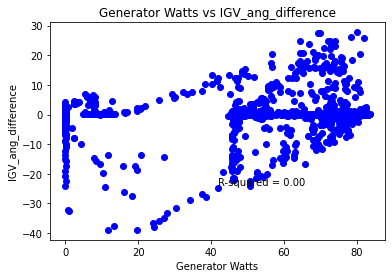

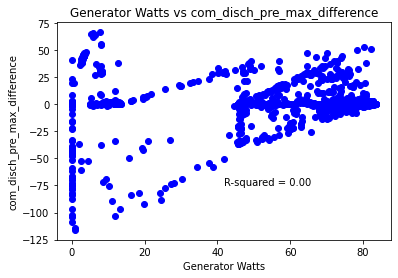

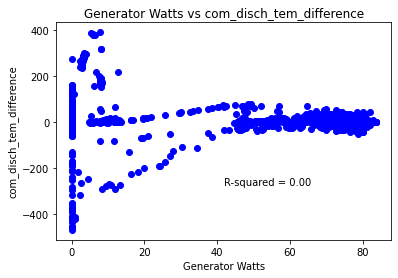

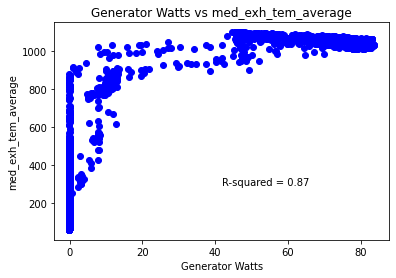

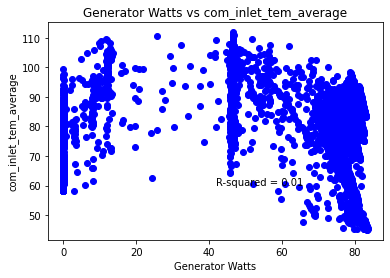

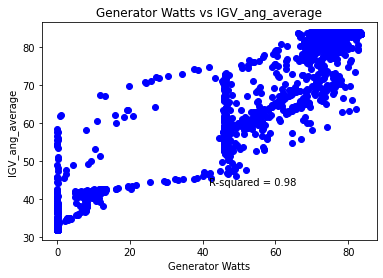

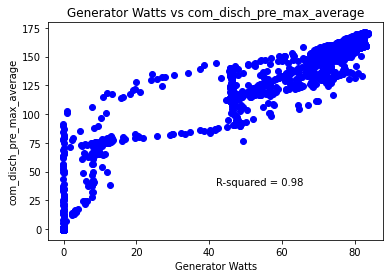

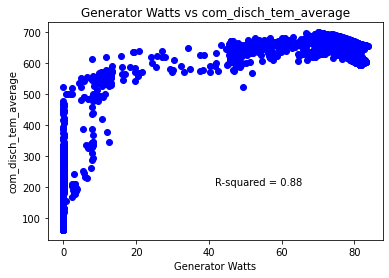

In [22]:
# calculate R square
# Create bars and choose color
name = []
for col in df.columns:
    name.append([col])
len_var = len(new_vars)

for i in range(len_var):
    plt.plot(gen_max_wat, new_vars[i], 'o', color='blue')
    # Add title and axis names
    plt.title('Generator Watts vs {}'.format(name[i+1][0]))
    plt.ylabel('{}'.format(name[i+1][0]))
    plt.xlabel('Generator Watts')
    corr_matrix = np.corrcoef(gen_max_wat, new_vars[i])
    corr = corr_matrix[0,1]
    R_sq = corr**2
    plt.text(0.5, 0.25, 'R-squared = %0.2f' % R_sq, transform=plt.gca().transAxes)
    plt.show()

In [9]:
# Selected variable based on above analyze:
# GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.934648
# GT1 IGV angle in deg {Avg}                                                        0.993491
# GT1 Compressor Discharge Press Max Select {Avg}                                   0.990797
# GT1 Compressor Discharge Temperature {Avg}                                        0.934783
# med_exh_tem_average                                                               0.934844
# IGV_ang_average                                                                   0.989188
# com_disch_pre_max_average                                                         0.987999
# com_disch_tem_average                                                             0.935702
select_variable = ['GT1 Exhaust Temp Median Corrected By Average {Avg}','GT1 IGV angle in deg {Avg}'
                   , 'GT1 Compressor Discharge Press Max Select {Avg}',
              'GT1 Compressor Discharge Temperature {Avg}']
gen_wat = ['GT1 Generator Watts Max Selected {Avg}']

X = df[select_variable].values
y = df[gen_wat].values

In [10]:
# Sandardization of data
PredictorScaler = MinMaxScaler(feature_range = (0, 1))
TargetVarScaler = MinMaxScaler(feature_range = (0, 1))

# Generating the standardized values of X and y
X = PredictorScaler.fit_transform(X)
y = TargetVarScaler.fit_transform(y)

In [11]:
# Split the data into training and testing set, 30% as test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5782, 4) (5782, 1) (2478, 4) (2478, 1)


In [12]:
# Finding best hyperparameters of ANN using GridSearchCV
def make_regression_ann(Optimizer_trial):
    model = Sequential()
    # Defining the Input layer (4) and FIRST hidden layer (7),
    model.add(Dense(units=7, input_dim=4, kernel_initializer='normal', activation='relu'))
    # Defining the Second layer of the model
    model.add(Dense(units=7, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    corr_matrix = np.corrcoef(orig, pred)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    
    print('#' * 50, 'R Squared:', R_sq)
    return R_sq

In [13]:
# Creating the regression ANN model
# RegModel = KerasRegressor(make_regression_ann, verbose=0)
RegModel = keras.wrappers.scikit_learn.KerasRegressor(make_regression_ann, verbose=0)
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)
# Listing all the parameters to try
Parameter_Trials = {'batch_size': [10, 20, 30],
                    'epochs': [10, 15, 20],
                    'Optimizer_trial': ['adam', 'rmsprop']
                    }
# Creating the Grid search space
grid_search = GridSearchCV(estimator=RegModel,
                           param_grid=Parameter_Trials,
                           scoring=custom_Scoring,
                           cv=5)

grid_search = grid_search.fit(X_train, y_train, verbose=1)
# print('Printing Best parameters: ', grid_search.best_params_)

<ipython-input-13-db5dafc41fdb>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  RegModel = keras.wrappers.scikit_learn.KerasRegressor(make_regression_ann, verbose=0)


Epoch 1/10
463/463 [==============================] - 1s 548us/step - loss: 0.0737
Epoch 2/10
463/463 [==============================] - 0s 560us/step - loss: 0.0013
Epoch 3/10
463/463 [==============================] - 0s 556us/step - loss: 0.0012
Epoch 4/10
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 5/10
463/463 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 6/10
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 7/10
463/463 [==============================] - 0s 528us/step - loss: 0.0012
Epoch 8/10
463/463 [==============================] - 0s 528us/step - loss: 0.0012
Epoch 9/10
463/463 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 10/10
463/463 [==============================] - 0s 521us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 532us/step - loss: 0.0839
Epoch 2/10
463/463 [==============================] - 0s 584us/step - loss: 0.0047
Epoch 3/10
463/463 [==============================] - 0s 525us/step - loss: 0.0015
Epoch 4/10
463/463 [==============================] - 0s 561us/step - loss: 9.7661e-04
Epoch 5/10
463/463 [==============================] - 0s 520us/step - loss: 9.2781e-04
Epoch 6/10
463/463 [==============================] - 0s 533us/step - loss: 8.5218e-04
Epoch 7/10
463/463 [==============================] - 0s 521us/step - loss: 7.8519e-04
Epoch 8/10
463/463 [==============================] - 0s 533us/step - loss: 7.2773e-04
Epoch 9/10
463/463 [==============================] - 0s 523us/step - loss: 6.5593e-04
Epoch 10/10
463/463 [==============================] - 0s 526us/step - loss: 5.8781e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 536us/step - loss: 0.0767
Epoch 2/10
463/463 [==============================] - 0s 518us/step - loss: 0.0030
Epoch 3/10
463/463 [==============================] - 0s 526us/step - loss: 0.0011
Epoch 4/10
463/463 [==============================] - 0s 523us/step - loss: 9.2323e-04
Epoch 5/10
463/463 [==============================] - 0s 527us/step - loss: 8.7283e-04
Epoch 6/10
463/463 [==============================] - 0s 531us/step - loss: 8.2377e-04
Epoch 7/10
463/463 [==============================] - 0s 562us/step - loss: 7.2579e-04
Epoch 8/10
463/463 [==============================] - 0s 522us/step - loss: 6.5326e-04
Epoch 9/10
463/463 [==============================] - 0s 527us/step - loss: 5.7518e-04
Epoch 10/10
463/463 [==============================] - 0s 521us/step - loss: 5.0807e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 551us/step - loss: 0.0784
Epoch 2/10
463/463 [==============================] - 0s 553us/step - loss: 0.0017
Epoch 3/10
463/463 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 4/10
463/463 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 5/10
463/463 [==============================] - 0s 553us/step - loss: 0.0013
Epoch 6/10
463/463 [==============================] - 0s 564us/step - loss: 0.0013
Epoch 7/10
463/463 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 8/10
463/463 [==============================] - 0s 556us/step - loss: 0.0012
Epoch 9/10
463/463 [==============================] - 0s 551us/step - loss: 0.0012
Epoch 10/10
463/463 [==============================] - 0s 553us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 541us/step - loss: 0.0774
Epoch 2/10
463/463 [==============================] - 0s 542us/step - loss: 0.0036
Epoch 3/10
463/463 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 4/10
463/463 [==============================] - 0s 541us/step - loss: 0.0011
Epoch 5/10
463/463 [==============================] - 0s 537us/step - loss: 9.7149e-04
Epoch 6/10
463/463 [==============================] - 0s 529us/step - loss: 9.1451e-04
Epoch 7/10
463/463 [==============================] - 0s 530us/step - loss: 8.4583e-04
Epoch 8/10
463/463 [==============================] - 0s 531us/step - loss: 7.9302e-04
Epoch 9/10
463/463 [==============================] - 0s 530us/step - loss: 7.3007e-04
Epoch 10/10
463/463 [==============================] - 0s 554us/step - loss: 6.4327e-04
Epoch 1/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 541us/step - loss: 0.0708
Epoch 2/15
463/463 [==============================] - 0s 527us/step - loss: 0.0020
Epoch 3/15
463/463 [==============================] - 0s 539us/step - loss: 0.0012
Epoch 4/15
463/463 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 5/15
463/463 [==============================] - 0s 530us/step - loss: 0.0012
Epoch 6/15
463/463 [==============================] - 0s 526us/step - loss: 0.0012
Epoch 7/15
463/463 [==============================] - 0s 530us/step - loss: 0.0012
Epoch 8/15
463/463 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 531us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 526us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 535us/step - loss: 0.0011
Epoch 12/15
463/463 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 542us/step - loss: 0.0740
Epoch 2/15
463/463 [==============================] - 0s 529us/step - loss: 0.0013
Epoch 3/15
463/463 [==============================] - 0s 558us/step - loss: 0.0012
Epoch 4/15
463/463 [==============================] - 0s 537us/step - loss: 0.0012
Epoch 5/15
463/463 [==============================] - 0s 530us/step - loss: 0.0012
Epoch 6/15
463/463 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 7/15
463/463 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 8/15
463/463 [==============================] - 0s 528us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 531us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 530us/step - loss: 0.0012
Epoch 12/15
463/463 [==============================] - 0s 524us/step - loss: 0.0011
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 535us/step - loss: 0.0723
Epoch 2/15
463/463 [==============================] - 0s 524us/step - loss: 0.0015
Epoch 3/15
463/463 [==============================] - 0s 525us/step - loss: 0.0013
Epoch 4/15
463/463 [==============================] - 0s 520us/step - loss: 0.0012
Epoch 5/15
463/463 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 6/15
463/463 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 7/15
463/463 [==============================] - 0s 578us/step - loss: 0.0012
Epoch 8/15
463/463 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 12/15
463/463 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 543us/step - loss: 0.0689
Epoch 2/15
463/463 [==============================] - 0s 525us/step - loss: 0.0027
Epoch 3/15
463/463 [==============================] - 0s 525us/step - loss: 0.0013
Epoch 4/15
463/463 [==============================] - 0s 531us/step - loss: 0.0013
Epoch 5/15
463/463 [==============================] - 0s 529us/step - loss: 0.0013
Epoch 6/15
463/463 [==============================] - 0s 526us/step - loss: 0.0013
Epoch 7/15
463/463 [==============================] - 0s 558us/step - loss: 0.0012
Epoch 8/15
463/463 [==============================] - 0s 527us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 557us/step - loss: 0.0012
Epoch 12/15
463/463 [==============================] - 0s 530us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 538us/step - loss: 0.0773
Epoch 2/15
463/463 [==============================] - 0s 540us/step - loss: 0.0036
Epoch 3/15
463/463 [==============================] - 0s 526us/step - loss: 0.0013
Epoch 4/15
463/463 [==============================] - 0s 536us/step - loss: 0.0010
Epoch 5/15
463/463 [==============================] - 0s 525us/step - loss: 9.4974e-04
Epoch 6/15
463/463 [==============================] - 0s 529us/step - loss: 9.0088e-04
Epoch 7/15
463/463 [==============================] - 0s 562us/step - loss: 8.0710e-04
Epoch 8/15
463/463 [==============================] - 0s 566us/step - loss: 7.4526e-04
Epoch 9/15
463/463 [==============================] - 0s 532us/step - loss: 6.7899e-04
Epoch 10/15
463/463 [==============================] - 0s 543us/step - loss: 6.2158e-04
Epoch 11/15
463/463 [==============================] - 0s 547us/step - loss: 5.3622e-04
Epoch 12/15
463/463 [==============================] - 0s 528us/step

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 539us/step - loss: 0.0714
Epoch 2/20
463/463 [==============================] - 0s 538us/step - loss: 0.0014
Epoch 3/20
463/463 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 4/20
463/463 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 5/20
463/463 [==============================] - 0s 561us/step - loss: 0.0012
Epoch 6/20
463/463 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 7/20
463/463 [==============================] - 0s 518us/step - loss: 0.0012
Epoch 8/20
463/463 [==============================] - 0s 558us/step - loss: 0.0012
Epoch 9/20
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 10/20
463/463 [==============================] - 0s 531us/step - loss: 0.0012
Epoch 11/20
463/463 [==============================] - 0s 518us/step - loss: 0.0012
Epoch 12/20
463/463 [==============================] - 0s 554us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 549us/step - loss: 0.0709
Epoch 2/20
463/463 [==============================] - 0s 537us/step - loss: 0.0016
Epoch 3/20
463/463 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 4/20
463/463 [==============================] - 0s 531us/step - loss: 0.0012
Epoch 5/20
463/463 [==============================] - 0s 541us/step - loss: 0.0012
Epoch 6/20
463/463 [==============================] - 0s 526us/step - loss: 0.0012
Epoch 7/20
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 8/20
463/463 [==============================] - 0s 526us/step - loss: 0.0012
Epoch 9/20
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 10/20
463/463 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 11/20
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 12/20
463/463 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 539us/step - loss: 0.0676
Epoch 2/20
463/463 [==============================] - 0s 532us/step - loss: 0.0026
Epoch 3/20
463/463 [==============================] - 0s 543us/step - loss: 0.0013
Epoch 4/20
463/463 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 5/20
463/463 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 6/20
463/463 [==============================] - 0s 559us/step - loss: 0.0012
Epoch 7/20
463/463 [==============================] - 0s 530us/step - loss: 0.0012
Epoch 8/20
463/463 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 9/20
463/463 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 10/20
463/463 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 11/20
463/463 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 12/20
463/463 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 561us/step - loss: 0.0718
Epoch 2/20
463/463 [==============================] - 0s 532us/step - loss: 0.0019
Epoch 3/20
463/463 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 4/20
463/463 [==============================] - 0s 521us/step - loss: 0.0013
Epoch 5/20
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 6/20
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 7/20
463/463 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 8/20
463/463 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 9/20
463/463 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 10/20
463/463 [==============================] - 0s 594us/step - loss: 0.0012
Epoch 11/20
463/463 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 12/20
463/463 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 0s 536us/step - loss: 0.0711
Epoch 2/20
463/463 [==============================] - 0s 526us/step - loss: 0.0022
Epoch 3/20
463/463 [==============================] - 0s 527us/step - loss: 0.0012
Epoch 4/20
463/463 [==============================] - 0s 528us/step - loss: 0.0011
Epoch 5/20
463/463 [==============================] - 0s 536us/step - loss: 0.0010
Epoch 6/20
463/463 [==============================] - 0s 526us/step - loss: 9.5775e-04
Epoch 7/20
463/463 [==============================] - 0s 528us/step - loss: 9.0670e-04
Epoch 8/20
463/463 [==============================] - 0s 530us/step - loss: 8.3770e-04
Epoch 9/20
463/463 [==============================] - 0s 551us/step - loss: 7.8691e-04
Epoch 10/20
463/463 [==============================] - 0s 548us/step - loss: 7.2564e-04
Epoch 11/20
463/463 [==============================] - 0s 527us/step - loss: 6.6046e-04
Epoch 12/20
463/463 [==============================] - 0s 559us/step - l

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 553us/step - loss: 0.1636
Epoch 2/10
232/232 [==============================] - 0s 540us/step - loss: 0.0043
Epoch 3/10
232/232 [==============================] - 0s 541us/step - loss: 0.0019
Epoch 4/10
232/232 [==============================] - 0s 550us/step - loss: 0.0014
Epoch 5/10
232/232 [==============================] - 0s 651us/step - loss: 0.0013
Epoch 6/10
232/232 [==============================] - 0s 598us/step - loss: 0.0013
Epoch 7/10
232/232 [==============================] - 0s 603us/step - loss: 0.0013
Epoch 8/10
232/232 [==============================] - 0s 600us/step - loss: 0.0013
Epoch 9/10
232/232 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 10/10
232/232 [==============================] - 0s 544us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 562us/step - loss: 0.1748
Epoch 2/10
232/232 [==============================] - 0s 579us/step - loss: 0.0045
Epoch 3/10
232/232 [==============================] - 0s 553us/step - loss: 0.0018
Epoch 4/10
232/232 [==============================] - 0s 562us/step - loss: 0.0014
Epoch 5/10
232/232 [==============================] - 0s 571us/step - loss: 0.0013
Epoch 6/10
232/232 [==============================] - 0s 573us/step - loss: 0.0013
Epoch 7/10
232/232 [==============================] - 0s 572us/step - loss: 0.0013
Epoch 8/10
232/232 [==============================] - 0s 563us/step - loss: 0.0012
Epoch 9/10
232/232 [==============================] - 0s 673us/step - loss: 0.0012
Epoch 10/10
232/232 [==============================] - 0s 660us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 573us/step - loss: 0.1327
Epoch 2/10
232/232 [==============================] - 0s 555us/step - loss: 0.0083
Epoch 3/10
232/232 [==============================] - 0s 556us/step - loss: 0.0039
Epoch 4/10
232/232 [==============================] - 0s 551us/step - loss: 0.0019
Epoch 5/10
232/232 [==============================] - 0s 552us/step - loss: 0.0011
Epoch 6/10
232/232 [==============================] - 0s 542us/step - loss: 9.6559e-04
Epoch 7/10
232/232 [==============================] - 0s 542us/step - loss: 9.2459e-04
Epoch 8/10
232/232 [==============================] - 0s 546us/step - loss: 8.8457e-04
Epoch 9/10
232/232 [==============================] - 0s 552us/step - loss: 8.4595e-04
Epoch 10/10
232/232 [==============================] - 0s 571us/step - loss: 8.2486e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 554us/step - loss: 0.1456
Epoch 2/10
232/232 [==============================] - 0s 536us/step - loss: 0.0037
Epoch 3/10
232/232 [==============================] - 0s 547us/step - loss: 0.0016
Epoch 4/10
232/232 [==============================] - 0s 565us/step - loss: 0.0012
Epoch 5/10
232/232 [==============================] - 0s 781us/step - loss: 0.0012
Epoch 6/10
232/232 [==============================] - 0s 730us/step - loss: 0.0012
Epoch 7/10
232/232 [==============================] - 0s 782us/step - loss: 0.0012
Epoch 8/10
232/232 [==============================] - 0s 546us/step - loss: 0.0012
Epoch 9/10
232/232 [==============================] - 0s 552us/step - loss: 0.0012
Epoch 10/10
232/232 [==============================] - 0s 551us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 596us/step - loss: 0.1673
Epoch 2/10
232/232 [==============================] - 0s 552us/step - loss: 0.0045
Epoch 3/10
232/232 [==============================] - 0s 546us/step - loss: 0.0013
Epoch 4/10
232/232 [==============================] - 0s 562us/step - loss: 0.0011
Epoch 5/10
232/232 [==============================] - 0s 557us/step - loss: 0.0011
Epoch 6/10
232/232 [==============================] - 0s 567us/step - loss: 0.0011
Epoch 7/10
232/232 [==============================] - 0s 571us/step - loss: 0.0011
Epoch 8/10
232/232 [==============================] - 0s 559us/step - loss: 0.0011
Epoch 9/10
232/232 [==============================] - 0s 562us/step - loss: 0.0011
Epoch 10/10
232/232 [==============================] - 0s 743us/step - loss: 0.0011
Epoch 1/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 592us/step - loss: 0.1511
Epoch 2/15
232/232 [==============================] - 0s 584us/step - loss: 0.0093
Epoch 3/15
232/232 [==============================] - 0s 564us/step - loss: 0.0041
Epoch 4/15
232/232 [==============================] - 0s 569us/step - loss: 0.0022
Epoch 5/15
232/232 [==============================] - 0s 557us/step - loss: 0.0012
Epoch 6/15
232/232 [==============================] - 0s 539us/step - loss: 9.9982e-04
Epoch 7/15
232/232 [==============================] - 0s 544us/step - loss: 9.4904e-04
Epoch 8/15
232/232 [==============================] - 0s 619us/step - loss: 9.1742e-04
Epoch 9/15
232/232 [==============================] - 0s 549us/step - loss: 8.7840e-04
Epoch 10/15
232/232 [==============================] - 0s 553us/step - loss: 8.4660e-04
Epoch 11/15
232/232 [==============================] - 0s 557us/step - loss: 8.1624e-04
Epoch 12/15
232/232 [==============================] - 0s 553us/step - l

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 560us/step - loss: 0.1411
Epoch 2/15
232/232 [==============================] - 0s 545us/step - loss: 0.0078
Epoch 3/15
232/232 [==============================] - 0s 546us/step - loss: 0.0033
Epoch 4/15
232/232 [==============================] - 0s 615us/step - loss: 0.0016
Epoch 5/15
232/232 [==============================] - 0s 588us/step - loss: 0.0011
Epoch 6/15
232/232 [==============================] - 0s 580us/step - loss: 0.0010
Epoch 7/15
232/232 [==============================] - 0s 543us/step - loss: 9.8583e-04
Epoch 8/15
232/232 [==============================] - 0s 552us/step - loss: 9.4478e-04
Epoch 9/15
232/232 [==============================] - 0s 584us/step - loss: 8.9760e-04
Epoch 10/15
232/232 [==============================] - 0s 589us/step - loss: 8.6062e-04
Epoch 11/15
232/232 [==============================] - 0s 555us/step - loss: 8.0886e-04
Epoch 12/15
232/232 [==============================] - 0s 597us/step - loss:

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 738us/step - loss: 0.1417
Epoch 2/15
232/232 [==============================] - 0s 811us/step - loss: 0.0050
Epoch 3/15
232/232 [==============================] - 0s 984us/step - loss: 0.0023
Epoch 4/15
232/232 [==============================] - 0s 592us/step - loss: 0.0014
Epoch 5/15
232/232 [==============================] - 0s 581us/step - loss: 0.0013
Epoch 6/15
232/232 [==============================] - 0s 641us/step - loss: 0.0012
Epoch 7/15
232/232 [==============================] - 0s 592us/step - loss: 0.0012
Epoch 8/15
232/232 [==============================] - 0s 686us/step - loss: 0.0011
Epoch 9/15
232/232 [==============================] - 0s 626us/step - loss: 0.0011
Epoch 10/15
232/232 [==============================] - 0s 576us/step - loss: 0.0011
Epoch 11/15
232/232 [==============================] - 0s 592us/step - loss: 0.0010
Epoch 12/15
232/232 [==============================] - 0s 641us/step - loss: 9.8194e-04
Epoch 13

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 632us/step - loss: 0.1360
Epoch 2/15
232/232 [==============================] - 0s 642us/step - loss: 0.0047
Epoch 3/15
232/232 [==============================] - 0s 607us/step - loss: 0.0021
Epoch 4/15
232/232 [==============================] - 0s 595us/step - loss: 0.0014
Epoch 5/15
232/232 [==============================] - 0s 558us/step - loss: 0.0013
Epoch 6/15
232/232 [==============================] - 0s 559us/step - loss: 0.0013
Epoch 7/15
232/232 [==============================] - 0s 619us/step - loss: 0.0012
Epoch 8/15
232/232 [==============================] - 0s 567us/step - loss: 0.0012
Epoch 9/15
232/232 [==============================] - 0s 609us/step - loss: 0.0012
Epoch 10/15
232/232 [==============================] - 0s 606us/step - loss: 0.0012
Epoch 11/15
232/232 [==============================] - 0s 595us/step - loss: 0.0012
Epoch 12/15
232/232 [==============================] - 0s 566us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 729us/step - loss: 0.1432
Epoch 2/15
232/232 [==============================] - 0s 559us/step - loss: 0.0037
Epoch 3/15
232/232 [==============================] - 0s 566us/step - loss: 0.0019
Epoch 4/15
232/232 [==============================] - 0s 560us/step - loss: 0.0013
Epoch 5/15
232/232 [==============================] - 0s 562us/step - loss: 0.0012
Epoch 6/15
232/232 [==============================] - 0s 814us/step - loss: 0.0012
Epoch 7/15
232/232 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 8/15
232/232 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 9/15
232/232 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 10/15
232/232 [==============================] - 0s 685us/step - loss: 0.0011
Epoch 11/15
232/232 [==============================] - 0s 620us/step - loss: 0.0011
Epoch 12/15
232/232 [==============================] - 0s 905us/step - loss: 0.0011
Epoch 13/15
232/23

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 630us/step - loss: 0.1340
Epoch 2/20
232/232 [==============================] - 0s 600us/step - loss: 0.0042
Epoch 3/20
232/232 [==============================] - 0s 617us/step - loss: 0.0019
Epoch 4/20
232/232 [==============================] - 0s 609us/step - loss: 0.0013
Epoch 5/20
232/232 [==============================] - 0s 640us/step - loss: 0.0012
Epoch 6/20
232/232 [==============================] - 0s 710us/step - loss: 0.0012
Epoch 7/20
232/232 [==============================] - 0s 572us/step - loss: 0.0012
Epoch 8/20
232/232 [==============================] - 0s 577us/step - loss: 0.0012
Epoch 9/20
232/232 [==============================] - 0s 564us/step - loss: 0.0012
Epoch 10/20
232/232 [==============================] - 0s 553us/step - loss: 0.0012
Epoch 11/20
232/232 [==============================] - 0s 594us/step - loss: 0.0012
Epoch 12/20
232/232 [==============================] - 0s 806us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

Epoch 1/20
232/232 [==============================] - 0s 574us/step - loss: 0.1658
Epoch 2/20
232/232 [==============================] - 0s 554us/step - loss: 0.0020
Epoch 3/20
232/232 [==============================] - 0s 549us/step - loss: 0.0013
Epoch 4/20
232/232 [==============================] - 0s 594us/step - loss: 0.0013
Epoch 5/20
232/232 [==============================] - 0s 602us/step - loss: 0.0012
Epoch 6/20
232/232 [==============================] - 0s 583us/step - loss: 0.0012
Epoch 7/20
232/232 [==============================] - 0s 603us/step - loss: 0.0012
Epoch 8/20
232/232 [==============================] - 0s 548us/step - loss: 0.0012
Epoch 9/20
232/232 [==============================] - 0s 585us/step - loss: 0.0012
Epoch 10/20
232/232 [==============================] - 0s 572us/step - loss: 0.0012
Epoch 11/20
232/232 [==============================] - 0s 562us/step - loss: 0.0012
Epoch 12/20
232/232 [==============================] - 0s 553us/step - loss: 0.0012
E

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 650us/step - loss: 0.1384
Epoch 2/20
232/232 [==============================] - 0s 614us/step - loss: 0.0038
Epoch 3/20
232/232 [==============================] - 0s 620us/step - loss: 0.0016
Epoch 4/20
232/232 [==============================] - 0s 566us/step - loss: 0.0013
Epoch 5/20
232/232 [==============================] - 0s 587us/step - loss: 0.0013
Epoch 6/20
232/232 [==============================] - 0s 554us/step - loss: 0.0012
Epoch 7/20
232/232 [==============================] - 0s 567us/step - loss: 0.0012
Epoch 8/20
232/232 [==============================] - 0s 570us/step - loss: 0.0012
Epoch 9/20
232/232 [==============================] - 0s 575us/step - loss: 0.0012
Epoch 10/20
232/232 [==============================] - 0s 572us/step - loss: 0.0012
Epoch 11/20
232/232 [==============================] - 0s 564us/step - loss: 0.0012
Epoch 12/20
232/232 [==============================] - 0s 554us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 585us/step - loss: 0.1210
Epoch 2/20
232/232 [==============================] - 0s 545us/step - loss: 0.0053
Epoch 3/20
232/232 [==============================] - 0s 560us/step - loss: 0.0024
Epoch 4/20
232/232 [==============================] - 0s 622us/step - loss: 0.0014
Epoch 5/20
232/232 [==============================] - 0s 550us/step - loss: 0.0012
Epoch 6/20
232/232 [==============================] - 0s 560us/step - loss: 0.0012
Epoch 7/20
232/232 [==============================] - 0s 559us/step - loss: 0.0012
Epoch 8/20
232/232 [==============================] - 0s 551us/step - loss: 0.0012
Epoch 9/20
232/232 [==============================] - 0s 546us/step - loss: 0.0012
Epoch 10/20
232/232 [==============================] - 0s 531us/step - loss: 0.0012
Epoch 11/20
232/232 [==============================] - 0s 535us/step - loss: 0.0012
Epoch 12/20
232/232 [==============================] - 0s 537us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 900us/step - loss: 0.1256
Epoch 2/20
232/232 [==============================] - 0s 918us/step - loss: 0.0047
Epoch 3/20
232/232 [==============================] - 0s 994us/step - loss: 0.0021
Epoch 4/20
232/232 [==============================] - 0s 734us/step - loss: 0.0013
Epoch 5/20
232/232 [==============================] - 0s 687us/step - loss: 0.0012
Epoch 6/20
232/232 [==============================] - 0s 664us/step - loss: 0.0012
Epoch 7/20
232/232 [==============================] - 0s 796us/step - loss: 0.0011
Epoch 8/20
232/232 [==============================] - 0s 645us/step - loss: 0.0011
Epoch 9/20
232/232 [==============================] - 0s 677us/step - loss: 0.0011
Epoch 10/20
232/232 [==============================] - 0s 605us/step - loss: 0.0011
Epoch 11/20
232/232 [==============================] - 0s 608us/step - loss: 0.0010
Epoch 12/20
232/232 [==============================] - 0s 626us/step - loss: 0.0010
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 593us/step - loss: 0.2147
Epoch 2/10
155/155 [==============================] - 0s 541us/step - loss: 0.0259
Epoch 3/10
155/155 [==============================] - 0s 547us/step - loss: 0.0070
Epoch 4/10
155/155 [==============================] - 0s 552us/step - loss: 0.0044
Epoch 5/10
155/155 [==============================] - 0s 561us/step - loss: 0.0027
Epoch 6/10
155/155 [==============================] - 0s 597us/step - loss: 0.0016
Epoch 7/10
155/155 [==============================] - 0s 706us/step - loss: 0.0012
Epoch 8/10
155/155 [==============================] - 0s 567us/step - loss: 0.0010
Epoch 9/10
155/155 [==============================] - 0s 537us/step - loss: 9.9878e-04
Epoch 10/10
155/155 [==============================] - 0s 643us/step - loss: 9.5962e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 720us/step - loss: 0.1894
Epoch 2/10
155/155 [==============================] - 0s 655us/step - loss: 0.0080
Epoch 3/10
155/155 [==============================] - 0s 540us/step - loss: 0.0029
Epoch 4/10
155/155 [==============================] - 0s 542us/step - loss: 0.0016
Epoch 5/10
155/155 [==============================] - 0s 547us/step - loss: 0.0013
Epoch 6/10
155/155 [==============================] - 0s 546us/step - loss: 0.0012
Epoch 7/10
155/155 [==============================] - 0s 562us/step - loss: 0.0012
Epoch 8/10
155/155 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 9/10
155/155 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 10/10
155/155 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 574us/step - loss: 0.1979
Epoch 2/10
155/155 [==============================] - 0s 523us/step - loss: 0.0192
Epoch 3/10
155/155 [==============================] - 0s 534us/step - loss: 0.0059
Epoch 4/10
155/155 [==============================] - 0s 533us/step - loss: 0.0037
Epoch 5/10
155/155 [==============================] - 0s 541us/step - loss: 0.0022
Epoch 6/10
155/155 [==============================] - 0s 537us/step - loss: 0.0014
Epoch 7/10
155/155 [==============================] - 0s 552us/step - loss: 0.0011
Epoch 8/10
155/155 [==============================] - 0s 538us/step - loss: 0.0010
Epoch 9/10
155/155 [==============================] - 0s 535us/step - loss: 9.8213e-04
Epoch 10/10
155/155 [==============================] - 0s 530us/step - loss: 9.6262e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 566us/step - loss: 0.1888
Epoch 2/10
155/155 [==============================] - 0s 672us/step - loss: 0.0075
Epoch 3/10
155/155 [==============================] - 0s 605us/step - loss: 0.0026
Epoch 4/10
155/155 [==============================] - 0s 535us/step - loss: 0.0015
Epoch 5/10
155/155 [==============================] - 0s 533us/step - loss: 0.0013
Epoch 6/10
155/155 [==============================] - 0s 529us/step - loss: 0.0013
Epoch 7/10
155/155 [==============================] - 0s 532us/step - loss: 0.0013
Epoch 8/10
155/155 [==============================] - 0s 531us/step - loss: 0.0013
Epoch 9/10
155/155 [==============================] - 0s 542us/step - loss: 0.0013
Epoch 10/10
155/155 [==============================] - 0s 540us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 683us/step - loss: 0.2168
Epoch 2/10
155/155 [==============================] - 0s 696us/step - loss: 0.0094
Epoch 3/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 4/10
155/155 [==============================] - 0s 825us/step - loss: 0.0017
Epoch 5/10
155/155 [==============================] - 0s 902us/step - loss: 0.0014
Epoch 6/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 7/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8/10
155/155 [==============================] - 0s 970us/step - loss: 0.0012
Epoch 9/10
155/155 [==============================] - 0s 860us/step - loss: 0.0012
Epoch 10/10
155/155 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 1/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 1s 1ms/step - loss: 0.1863
Epoch 2/15
155/155 [==============================] - 0s 760us/step - loss: 0.0064
Epoch 3/15
155/155 [==============================] - 0s 659us/step - loss: 0.0025
Epoch 4/15
155/155 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 5/15
155/155 [==============================] - 0s 980us/step - loss: 0.0014
Epoch 6/15
155/155 [==============================] - 0s 922us/step - loss: 0.0013
Epoch 7/15
155/155 [==============================] - 0s 727us/step - loss: 0.0013
Epoch 8/15
155/155 [==============================] - 0s 642us/step - loss: 0.0013
Epoch 9/15
155/155 [==============================] - 0s 666us/step - loss: 0.0013
Epoch 10/15
155/155 [==============================] - 0s 690us/step - loss: 0.0012
Epoch 11/15
155/155 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 12/15
155/155 [==============================] - 0s 878us/step - loss: 0.0012
Epoch 13/15
155/15

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

Epoch 1/15
155/155 [==============================] - 0s 815us/step - loss: 0.1960
Epoch 2/15
155/155 [==============================] - 0s 678us/step - loss: 0.0045
Epoch 3/15
155/155 [==============================] - 0s 694us/step - loss: 0.0018
Epoch 4/15
155/155 [==============================] - 0s 724us/step - loss: 0.0013
Epoch 5/15
155/155 [==============================] - 0s 848us/step - loss: 0.0012
Epoch 6/15
155/155 [==============================] - 0s 627us/step - loss: 0.0012
Epoch 7/15
155/155 [==============================] - 0s 619us/step - loss: 0.0012
Epoch 8/15
155/155 [==============================] - 0s 610us/step - loss: 0.0012
Epoch 9/15
155/155 [==============================] - 0s 577us/step - loss: 0.0012
Epoch 10/15
155/155 [==============================] - 0s 600us/step - loss: 0.0012
Epoch 11/15
155/155 [==============================] - 0s 775us/step - loss: 0.0011
Epoch 12/15
155/155 [==============================] - 0s 717us/step - loss: 0.0012
E

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 587us/step - loss: 0.2007
Epoch 2/15
155/155 [==============================] - 0s 556us/step - loss: 0.0208
Epoch 3/15
155/155 [==============================] - 0s 563us/step - loss: 0.0059
Epoch 4/15
155/155 [==============================] - 0s 577us/step - loss: 0.0035
Epoch 5/15
155/155 [==============================] - 0s 587us/step - loss: 0.0021
Epoch 6/15
155/155 [==============================] - 0s 564us/step - loss: 0.0013
Epoch 7/15
155/155 [==============================] - 0s 565us/step - loss: 0.0011
Epoch 8/15
155/155 [==============================] - 0s 561us/step - loss: 0.0010
Epoch 9/15
155/155 [==============================] - 0s 582us/step - loss: 9.8082e-04
Epoch 10/15
155/155 [==============================] - 0s 558us/step - loss: 9.6199e-04
Epoch 11/15
155/155 [==============================] - 0s 545us/step - loss: 9.2971e-04
Epoch 12/15
155/155 [==============================] - 0s 583us/step - loss: 8.9800e

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

Epoch 1/15
155/155 [==============================] - 0s 646us/step - loss: 0.1946
Epoch 2/15
155/155 [==============================] - 0s 549us/step - loss: 0.0099
Epoch 3/15
155/155 [==============================] - 0s 618us/step - loss: 0.0030
Epoch 4/15
155/155 [==============================] - 0s 538us/step - loss: 0.0015
Epoch 5/15
155/155 [==============================] - 0s 551us/step - loss: 0.0011
Epoch 6/15
155/155 [==============================] - 0s 686us/step - loss: 0.0011
Epoch 7/15
155/155 [==============================] - 0s 531us/step - loss: 0.0010
Epoch 8/15
155/155 [==============================] - 0s 537us/step - loss: 9.6820e-04
Epoch 9/15
155/155 [==============================] - 0s 536us/step - loss: 9.3093e-04
Epoch 10/15
155/155 [==============================] - 0s 535us/step - loss: 8.8906e-04
Epoch 11/15
155/155 [==============================] - 0s 551us/step - loss: 8.5764e-04
Epoch 12/15
155/155 [==============================] - 0s 540us/step 

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 591us/step - loss: 0.1897
Epoch 2/15
155/155 [==============================] - 0s 599us/step - loss: 0.0119
Epoch 3/15
155/155 [==============================] - 0s 606us/step - loss: 0.0047
Epoch 4/15
155/155 [==============================] - 0s 605us/step - loss: 0.0026
Epoch 5/15
155/155 [==============================] - 0s 598us/step - loss: 0.0016
Epoch 6/15
155/155 [==============================] - 0s 575us/step - loss: 0.0012
Epoch 7/15
155/155 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 8/15
155/155 [==============================] - 0s 600us/step - loss: 0.0012
Epoch 9/15
155/155 [==============================] - 0s 575us/step - loss: 0.0011
Epoch 10/15
155/155 [==============================] - 0s 578us/step - loss: 0.0011
Epoch 11/15
155/155 [==============================] - 0s 586us/step - loss: 0.0011
Epoch 12/15
155/155 [==============================] - 0s 592us/step - loss: 0.0011
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 612us/step - loss: 0.2140
Epoch 2/20
155/155 [==============================] - 0s 615us/step - loss: 0.0041
Epoch 3/20
155/155 [==============================] - 0s 591us/step - loss: 0.0013
Epoch 4/20
155/155 [==============================] - 0s 639us/step - loss: 0.0012
Epoch 5/20
155/155 [==============================] - 0s 629us/step - loss: 0.0012
Epoch 6/20
155/155 [==============================] - 0s 638us/step - loss: 0.0012
Epoch 7/20
155/155 [==============================] - 0s 591us/step - loss: 0.0012
Epoch 8/20
155/155 [==============================] - 0s 601us/step - loss: 0.0011
Epoch 9/20
155/155 [==============================] - 0s 621us/step - loss: 0.0011
Epoch 10/20
155/155 [==============================] - 0s 624us/step - loss: 0.0011
Epoch 11/20
155/155 [==============================] - 0s 618us/step - loss: 0.0011
Epoch 12/20
155/155 [==============================] - 0s 604us/step - loss: 0.0011
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 671us/step - loss: 0.1950
Epoch 2/20
155/155 [==============================] - 0s 642us/step - loss: 0.0107
Epoch 3/20
155/155 [==============================] - 0s 596us/step - loss: 0.0031
Epoch 4/20
155/155 [==============================] - 0s 599us/step - loss: 0.0018
Epoch 5/20
155/155 [==============================] - 0s 593us/step - loss: 0.0013
Epoch 6/20
155/155 [==============================] - 0s 586us/step - loss: 0.0012
Epoch 7/20
155/155 [==============================] - 0s 599us/step - loss: 0.0012
Epoch 8/20
155/155 [==============================] - 0s 598us/step - loss: 0.0012
Epoch 9/20
155/155 [==============================] - 0s 597us/step - loss: 0.0012
Epoch 10/20
155/155 [==============================] - 0s 597us/step - loss: 0.0012
Epoch 11/20
155/155 [==============================] - 0s 592us/step - loss: 0.0012
Epoch 12/20
155/155 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 640us/step - loss: 0.2107
Epoch 2/20
155/155 [==============================] - 0s 640us/step - loss: 0.0071
Epoch 3/20
155/155 [==============================] - 0s 663us/step - loss: 0.0018
Epoch 4/20
155/155 [==============================] - 0s 673us/step - loss: 0.0012
Epoch 5/20
155/155 [==============================] - 0s 638us/step - loss: 0.0012
Epoch 6/20
155/155 [==============================] - 0s 616us/step - loss: 0.0011
Epoch 7/20
155/155 [==============================] - 0s 606us/step - loss: 0.0011
Epoch 8/20
155/155 [==============================] - 0s 609us/step - loss: 0.0011
Epoch 9/20
155/155 [==============================] - 0s 615us/step - loss: 0.0011
Epoch 10/20
155/155 [==============================] - 0s 647us/step - loss: 0.0011
Epoch 11/20
155/155 [==============================] - 0s 629us/step - loss: 0.0011
Epoch 12/20
155/155 [==============================] - 0s 605us/step - loss: 0.0011
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 683us/step - loss: 0.2068
Epoch 2/20
155/155 [==============================] - 0s 784us/step - loss: 0.0056
Epoch 3/20
155/155 [==============================] - 0s 682us/step - loss: 0.0017
Epoch 4/20
155/155 [==============================] - 0s 659us/step - loss: 0.0014
Epoch 5/20
155/155 [==============================] - 0s 669us/step - loss: 0.0013
Epoch 6/20
155/155 [==============================] - 0s 701us/step - loss: 0.0013
Epoch 7/20
155/155 [==============================] - 0s 680us/step - loss: 0.0013
Epoch 8/20
155/155 [==============================] - 0s 670us/step - loss: 0.0013
Epoch 9/20
155/155 [==============================] - 0s 700us/step - loss: 0.0012
Epoch 10/20
155/155 [==============================] - 0s 786us/step - loss: 0.0012
Epoch 11/20
155/155 [==============================] - 0s 626us/step - loss: 0.0011
Epoch 12/20
155/155 [==============================] - 0s 617us/step - loss: 0.0011
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 671us/step - loss: 0.2107
Epoch 2/20
155/155 [==============================] - 0s 730us/step - loss: 0.0170
Epoch 3/20
155/155 [==============================] - 0s 683us/step - loss: 0.0041
Epoch 4/20
155/155 [==============================] - 0s 607us/step - loss: 0.0022
Epoch 5/20
155/155 [==============================] - 0s 609us/step - loss: 0.0014
Epoch 6/20
155/155 [==============================] - 0s 622us/step - loss: 0.0013
Epoch 7/20
155/155 [==============================] - 0s 617us/step - loss: 0.0012
Epoch 8/20
155/155 [==============================] - 0s 593us/step - loss: 0.0012
Epoch 9/20
155/155 [==============================] - 0s 601us/step - loss: 0.0012
Epoch 10/20
155/155 [==============================] - 0s 595us/step - loss: 0.0011
Epoch 11/20
155/155 [==============================] - 0s 723us/step - loss: 0.0011
Epoch 12/20
155/155 [==============================] - 0s 588us/step - loss: 0.0011
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 577us/step - loss: 0.0712
Epoch 2/10
463/463 [==============================] - 0s 545us/step - loss: 0.0016
Epoch 3/10
463/463 [==============================] - 0s 546us/step - loss: 0.0014
Epoch 4/10
463/463 [==============================] - 0s 542us/step - loss: 0.0013
Epoch 5/10
463/463 [==============================] - 0s 564us/step - loss: 0.0012
Epoch 6/10
463/463 [==============================] - 0s 642us/step - loss: 0.0012
Epoch 7/10
463/463 [==============================] - 0s 595us/step - loss: 0.0012
Epoch 8/10
463/463 [==============================] - 0s 622us/step - loss: 0.0011
Epoch 9/10
463/463 [==============================] - 0s 595us/step - loss: 0.0011
Epoch 10/10
463/463 [==============================] - 0s 564us/step - loss: 0.0011
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 541us/step - loss: 0.0681
Epoch 2/10
463/463 [==============================] - 0s 561us/step - loss: 0.0019
Epoch 3/10
463/463 [==============================] - 0s 543us/step - loss: 0.0012
Epoch 4/10
463/463 [==============================] - 0s 537us/step - loss: 0.0011
Epoch 5/10
463/463 [==============================] - 0s 526us/step - loss: 0.0010
Epoch 6/10
463/463 [==============================] - 0s 522us/step - loss: 9.7118e-04
Epoch 7/10
463/463 [==============================] - 0s 525us/step - loss: 9.0709e-04
Epoch 8/10
463/463 [==============================] - 0s 563us/step - loss: 8.3736e-04
Epoch 9/10
463/463 [==============================] - 0s 527us/step - loss: 7.8453e-04
Epoch 10/10
463/463 [==============================] - 0s 560us/step - loss: 7.2033e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 578us/step - loss: 0.0721
Epoch 2/10
463/463 [==============================] - 0s 533us/step - loss: 0.0016
Epoch 3/10
463/463 [==============================] - 0s 563us/step - loss: 0.0013
Epoch 4/10
463/463 [==============================] - 0s 847us/step - loss: 0.0013
Epoch 5/10
463/463 [==============================] - 0s 908us/step - loss: 0.0013
Epoch 6/10
463/463 [==============================] - 0s 935us/step - loss: 0.0012
Epoch 7/10
463/463 [==============================] - 0s 701us/step - loss: 0.0012
Epoch 8/10
463/463 [==============================] - 0s 537us/step - loss: 0.0012
Epoch 9/10
463/463 [==============================] - 0s 530us/step - loss: 0.0012
Epoch 10/10
463/463 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 558us/step - loss: 0.0649
Epoch 2/10
463/463 [==============================] - 0s 565us/step - loss: 0.0016
Epoch 3/10
463/463 [==============================] - 0s 553us/step - loss: 0.0013
Epoch 4/10
463/463 [==============================] - 0s 548us/step - loss: 0.0013
Epoch 5/10
463/463 [==============================] - 0s 546us/step - loss: 0.0013
Epoch 6/10
463/463 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 7/10
463/463 [==============================] - 0s 568us/step - loss: 0.0013
Epoch 8/10
463/463 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 9/10
463/463 [==============================] - 0s 575us/step - loss: 0.0012
Epoch 10/10
463/463 [==============================] - 0s 612us/step - loss: 0.0012


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

Epoch 1/10
463/463 [==============================] - 1s 562us/step - loss: 0.0703
Epoch 2/10
463/463 [==============================] - 0s 550us/step - loss: 0.0016
Epoch 3/10
463/463 [==============================] - 0s 536us/step - loss: 0.0013
Epoch 4/10
463/463 [==============================] - 0s 539us/step - loss: 0.0013
Epoch 5/10
463/463 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 6/10
463/463 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 7/10
463/463 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 8/10
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 9/10
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 10/10
463/463 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 1/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 531us/step - loss: 0.0644
Epoch 2/15
463/463 [==============================] - 0s 511us/step - loss: 0.0014
Epoch 3/15
463/463 [==============================] - 0s 518us/step - loss: 0.0013
Epoch 4/15
463/463 [==============================] - 0s 517us/step - loss: 0.0012
Epoch 5/15
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 6/15
463/463 [==============================] - 0s 542us/step - loss: 0.0012
Epoch 7/15
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 8/15
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 510us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 511us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 513us/step - loss: 0.0012
Epoch 12/15
463/463 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 528us/step - loss: 0.0826
Epoch 2/15
463/463 [==============================] - 0s 560us/step - loss: 0.0018
Epoch 3/15
463/463 [==============================] - 0s 537us/step - loss: 0.0012
Epoch 4/15
463/463 [==============================] - 0s 517us/step - loss: 0.0011
Epoch 5/15
463/463 [==============================] - 0s 516us/step - loss: 0.0011
Epoch 6/15
463/463 [==============================] - 0s 522us/step - loss: 0.0010
Epoch 7/15
463/463 [==============================] - 0s 508us/step - loss: 9.6334e-04
Epoch 8/15
463/463 [==============================] - 0s 523us/step - loss: 9.0126e-04
Epoch 9/15
463/463 [==============================] - 0s 512us/step - loss: 8.4772e-04
Epoch 10/15
463/463 [==============================] - 0s 585us/step - loss: 7.8857e-04
Epoch 11/15
463/463 [==============================] - 0s 530us/step - loss: 7.3714e-04
Epoch 12/15
463/463 [==============================] - 0s 522us/step - loss:

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 629us/step - loss: 0.0660
Epoch 2/15
463/463 [==============================] - 0s 589us/step - loss: 0.0015
Epoch 3/15
463/463 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 4/15
463/463 [==============================] - 0s 622us/step - loss: 0.0013
Epoch 5/15
463/463 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 6/15
463/463 [==============================] - 0s 548us/step - loss: 0.0013
Epoch 7/15
463/463 [==============================] - 0s 541us/step - loss: 0.0012
Epoch 8/15
463/463 [==============================] - 0s 517us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 514us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 517us/step - loss: 0.0012
Epoch 12/15
463/463 [==============================] - 0s 507us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 593us/step - loss: 0.0607
Epoch 2/15
463/463 [==============================] - 0s 535us/step - loss: 0.0015
Epoch 3/15
463/463 [==============================] - 0s 576us/step - loss: 0.0014
Epoch 4/15
463/463 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 5/15
463/463 [==============================] - 0s 531us/step - loss: 0.0013
Epoch 6/15
463/463 [==============================] - 0s 523us/step - loss: 0.0013
Epoch 7/15
463/463 [==============================] - 0s 519us/step - loss: 0.0013
Epoch 8/15
463/463 [==============================] - 0s 570us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 535us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 12/15
463/463 [==============================] - 0s 539us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 538us/step - loss: 0.0728
Epoch 2/15
463/463 [==============================] - 0s 513us/step - loss: 0.0014
Epoch 3/15
463/463 [==============================] - 0s 518us/step - loss: 0.0013
Epoch 4/15
463/463 [==============================] - 0s 513us/step - loss: 0.0012
Epoch 5/15
463/463 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 6/15
463/463 [==============================] - 0s 518us/step - loss: 0.0012
Epoch 7/15
463/463 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 8/15
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 9/15
463/463 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 10/15
463/463 [==============================] - 0s 521us/step - loss: 0.0012
Epoch 11/15
463/463 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 12/15
463/463 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 594us/step - loss: 0.0806
Epoch 2/20
463/463 [==============================] - 0s 529us/step - loss: 0.0027
Epoch 3/20
463/463 [==============================] - 0s 568us/step - loss: 0.0011
Epoch 4/20
463/463 [==============================] - 0s 536us/step - loss: 0.0010
Epoch 5/20
463/463 [==============================] - 0s 516us/step - loss: 9.3869e-04
Epoch 6/20
463/463 [==============================] - 0s 538us/step - loss: 8.7982e-04
Epoch 7/20
463/463 [==============================] - 0s 553us/step - loss: 8.1764e-04
Epoch 8/20
463/463 [==============================] - 0s 518us/step - loss: 7.5068e-04
Epoch 9/20
463/463 [==============================] - 0s 520us/step - loss: 6.7645e-04
Epoch 10/20
463/463 [==============================] - 0s 533us/step - loss: 6.1975e-04
Epoch 11/20
463/463 [==============================] - 0s 522us/step - loss: 5.5976e-04
Epoch 12/20
463/463 [==============================] - 0s 517us/step

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 530us/step - loss: 0.0663
Epoch 2/20
463/463 [==============================] - 0s 536us/step - loss: 0.0017
Epoch 3/20
463/463 [==============================] - 0s 520us/step - loss: 0.0011
Epoch 4/20
463/463 [==============================] - 0s 515us/step - loss: 9.8257e-04
Epoch 5/20
463/463 [==============================] - 0s 512us/step - loss: 9.0143e-04
Epoch 6/20
463/463 [==============================] - 0s 515us/step - loss: 8.2049e-04
Epoch 7/20
463/463 [==============================] - 0s 509us/step - loss: 7.4689e-04
Epoch 8/20
463/463 [==============================] - 0s 518us/step - loss: 6.8490e-04
Epoch 9/20
463/463 [==============================] - 0s 510us/step - loss: 6.1061e-04
Epoch 10/20
463/463 [==============================] - 0s 516us/step - loss: 5.3065e-04
Epoch 11/20
463/463 [==============================] - 0s 511us/step - loss: 4.7273e-04
Epoch 12/20
463/463 [==============================] - 0s 517us/

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 572us/step - loss: 0.0999
Epoch 2/20
463/463 [==============================] - 0s 537us/step - loss: 0.0015
Epoch 3/20
463/463 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 4/20
463/463 [==============================] - 0s 525us/step - loss: 0.0011
Epoch 5/20
463/463 [==============================] - 0s 526us/step - loss: 0.0011
Epoch 6/20
463/463 [==============================] - 0s 524us/step - loss: 9.7682e-04
Epoch 7/20
463/463 [==============================] - 0s 527us/step - loss: 9.0505e-04
Epoch 8/20
463/463 [==============================] - 0s 522us/step - loss: 8.3675e-04
Epoch 9/20
463/463 [==============================] - 0s 527us/step - loss: 7.7534e-04
Epoch 10/20
463/463 [==============================] - 0s 525us/step - loss: 7.1045e-04
Epoch 11/20
463/463 [==============================] - 0s 526us/step - loss: 6.4656e-04
Epoch 12/20
463/463 [==============================] - 0s 524us/step - l

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

463/463 [==============================] - 1s 550us/step - loss: 0.0688
Epoch 2/20
463/463 [==============================] - 0s 522us/step - loss: 0.0016
Epoch 3/20
463/463 [==============================] - 0s 512us/step - loss: 0.0011
Epoch 4/20
463/463 [==============================] - 0s 511us/step - loss: 0.0010
Epoch 5/20
463/463 [==============================] - 0s 510us/step - loss: 9.2705e-04
Epoch 6/20
463/463 [==============================] - 0s 521us/step - loss: 8.6621e-04
Epoch 7/20
463/463 [==============================] - 0s 533us/step - loss: 7.7774e-04
Epoch 8/20
463/463 [==============================] - 0s 521us/step - loss: 6.9416e-04
Epoch 9/20
463/463 [==============================] - 0s 508us/step - loss: 6.3181e-04
Epoch 10/20
463/463 [==============================] - 0s 549us/step - loss: 5.3733e-04
Epoch 11/20
463/463 [==============================] - 0s 514us/step - loss: 4.5331e-04
Epoch 12/20
463/463 [==============================] - 0s 513us/step

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

Epoch 1/20
463/463 [==============================] - 1s 526us/step - loss: 0.0899
Epoch 2/20
463/463 [==============================] - 0s 508us/step - loss: 0.0017
Epoch 3/20
463/463 [==============================] - 0s 546us/step - loss: 0.0013
Epoch 4/20
463/463 [==============================] - 0s 545us/step - loss: 0.0012
Epoch 5/20
463/463 [==============================] - 0s 538us/step - loss: 0.0012
Epoch 6/20
463/463 [==============================] - 0s 516us/step - loss: 0.0012
Epoch 7/20
463/463 [==============================] - 0s 509us/step - loss: 0.0012
Epoch 8/20
463/463 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 9/20
463/463 [==============================] - 0s 510us/step - loss: 0.0012
Epoch 10/20
463/463 [==============================] - 0s 514us/step - loss: 0.0012
Epoch 11/20
463/463 [==============================] - 0s 507us/step - loss: 0.0012
Epoch 12/20
463/463 [==============================] - 0s 513us/step - loss: 0.0012
E

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 559us/step - loss: 0.1831
Epoch 2/10
232/232 [==============================] - 0s 516us/step - loss: 0.0113
Epoch 3/10
232/232 [==============================] - 0s 520us/step - loss: 0.0027
Epoch 4/10
232/232 [==============================] - 0s 524us/step - loss: 0.0014
Epoch 5/10
232/232 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 6/10
232/232 [==============================] - 0s 520us/step - loss: 0.0012
Epoch 7/10
232/232 [==============================] - 0s 517us/step - loss: 0.0012
Epoch 8/10
232/232 [==============================] - 0s 521us/step - loss: 0.0011
Epoch 9/10
232/232 [==============================] - 0s 535us/step - loss: 0.0011
Epoch 10/10
232/232 [==============================] - 0s 520us/step - loss: 0.0010
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 547us/step - loss: 0.1659
Epoch 2/10
232/232 [==============================] - 0s 526us/step - loss: 0.0041
Epoch 3/10
232/232 [==============================] - 0s 530us/step - loss: 0.0014
Epoch 4/10
232/232 [==============================] - 0s 526us/step - loss: 0.0012
Epoch 5/10
232/232 [==============================] - 0s 519us/step - loss: 0.0011
Epoch 6/10
232/232 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 7/10
232/232 [==============================] - 0s 579us/step - loss: 0.0010
Epoch 8/10
232/232 [==============================] - 0s 531us/step - loss: 9.4663e-04
Epoch 9/10
232/232 [==============================] - 0s 527us/step - loss: 9.0615e-04
Epoch 10/10
232/232 [==============================] - 0s 529us/step - loss: 8.5176e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 555us/step - loss: 0.1296
Epoch 2/10
232/232 [==============================] - 0s 550us/step - loss: 0.0049
Epoch 3/10
232/232 [==============================] - 0s 526us/step - loss: 0.0016
Epoch 4/10
232/232 [==============================] - 0s 515us/step - loss: 0.0013
Epoch 5/10
232/232 [==============================] - 0s 521us/step - loss: 0.0013
Epoch 6/10
232/232 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 7/10
232/232 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 8/10
232/232 [==============================] - 0s 516us/step - loss: 0.0012
Epoch 9/10
232/232 [==============================] - 0s 539us/step - loss: 0.0012
Epoch 10/10
232/232 [==============================] - 0s 555us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 564us/step - loss: 0.1359
Epoch 2/10
232/232 [==============================] - 0s 526us/step - loss: 0.0038
Epoch 3/10
232/232 [==============================] - 0s 520us/step - loss: 0.0014
Epoch 4/10
232/232 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 5/10
232/232 [==============================] - 0s 525us/step - loss: 0.0013
Epoch 6/10
232/232 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 7/10
232/232 [==============================] - 0s 523us/step - loss: 0.0013
Epoch 8/10
232/232 [==============================] - 0s 531us/step - loss: 0.0012
Epoch 9/10
232/232 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 10/10
232/232 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 549us/step - loss: 0.1389
Epoch 2/10
232/232 [==============================] - 0s 517us/step - loss: 0.0051
Epoch 3/10
232/232 [==============================] - 0s 517us/step - loss: 0.0016
Epoch 4/10
232/232 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 5/10
232/232 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 6/10
232/232 [==============================] - 0s 514us/step - loss: 0.0012
Epoch 7/10
232/232 [==============================] - 0s 516us/step - loss: 0.0012
Epoch 8/10
232/232 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 9/10
232/232 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 10/10
232/232 [==============================] - 0s 514us/step - loss: 0.0012
Epoch 1/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 553us/step - loss: 0.1317
Epoch 2/15
232/232 [==============================] - 0s 523us/step - loss: 0.0044
Epoch 3/15
232/232 [==============================] - 0s 542us/step - loss: 0.0015
Epoch 4/15
232/232 [==============================] - 0s 530us/step - loss: 0.0013
Epoch 5/15
232/232 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 6/15
232/232 [==============================] - 0s 520us/step - loss: 0.0013
Epoch 7/15
232/232 [==============================] - 0s 520us/step - loss: 0.0013
Epoch 8/15
232/232 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 9/15
232/232 [==============================] - 0s 523us/step - loss: 0.0012
Epoch 10/15
232/232 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 11/15
232/232 [==============================] - 0s 555us/step - loss: 0.0012
Epoch 12/15
232/232 [==============================] - 0s 570us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 568us/step - loss: 0.1336
Epoch 2/15
232/232 [==============================] - 0s 529us/step - loss: 0.0046
Epoch 3/15
232/232 [==============================] - 0s 517us/step - loss: 0.0018
Epoch 4/15
232/232 [==============================] - 0s 520us/step - loss: 0.0014
Epoch 5/15
232/232 [==============================] - 0s 520us/step - loss: 0.0014
Epoch 6/15
232/232 [==============================] - 0s 527us/step - loss: 0.0014
Epoch 7/15
232/232 [==============================] - 0s 520us/step - loss: 0.0013
Epoch 8/15
232/232 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 9/15
232/232 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 10/15
232/232 [==============================] - 0s 539us/step - loss: 0.0013
Epoch 11/15
232/232 [==============================] - 0s 521us/step - loss: 0.0013
Epoch 12/15
232/232 [==============================] - 0s 520us/step - loss: 0.0013
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 565us/step - loss: 0.2327
Epoch 2/15
232/232 [==============================] - 0s 528us/step - loss: 0.0726
Epoch 3/15
232/232 [==============================] - 0s 518us/step - loss: 0.0018
Epoch 4/15
232/232 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 5/15
232/232 [==============================] - 0s 538us/step - loss: 0.0012
Epoch 6/15
232/232 [==============================] - 0s 521us/step - loss: 0.0012
Epoch 7/15
232/232 [==============================] - 0s 538us/step - loss: 0.0012
Epoch 8/15
232/232 [==============================] - 0s 547us/step - loss: 0.0012
Epoch 9/15
232/232 [==============================] - 0s 552us/step - loss: 0.0011
Epoch 10/15
232/232 [==============================] - 0s 561us/step - loss: 0.0011
Epoch 11/15
232/232 [==============================] - 0s 538us/step - loss: 0.0011
Epoch 12/15
232/232 [==============================] - 0s 536us/step - loss: 0.0011
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 563us/step - loss: 0.1271
Epoch 2/15
232/232 [==============================] - 0s 529us/step - loss: 0.0046
Epoch 3/15
232/232 [==============================] - 0s 521us/step - loss: 0.0015
Epoch 4/15
232/232 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 5/15
232/232 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 6/15
232/232 [==============================] - 0s 536us/step - loss: 0.0012
Epoch 7/15
232/232 [==============================] - 0s 520us/step - loss: 0.0011
Epoch 8/15
232/232 [==============================] - 0s 525us/step - loss: 0.0011
Epoch 9/15
232/232 [==============================] - 0s 524us/step - loss: 0.0010
Epoch 10/15
232/232 [==============================] - 0s 561us/step - loss: 9.8064e-04
Epoch 11/15
232/232 [==============================] - 0s 562us/step - loss: 9.5902e-04
Epoch 12/15
232/232 [==============================] - 0s 541us/step - loss: 9.0513e-04


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

Epoch 1/15
232/232 [==============================] - 0s 564us/step - loss: 0.1756
Epoch 2/15
232/232 [==============================] - 0s 562us/step - loss: 0.0058
Epoch 3/15
232/232 [==============================] - 0s 559us/step - loss: 0.0019
Epoch 4/15
232/232 [==============================] - 0s 537us/step - loss: 0.0013
Epoch 5/15
232/232 [==============================] - 0s 526us/step - loss: 0.0013
Epoch 6/15
232/232 [==============================] - 0s 561us/step - loss: 0.0013
Epoch 7/15
232/232 [==============================] - 0s 537us/step - loss: 0.0012
Epoch 8/15
232/232 [==============================] - 0s 561us/step - loss: 0.0012
Epoch 9/15
232/232 [==============================] - 0s 597us/step - loss: 0.0012
Epoch 10/15
232/232 [==============================] - 0s 568us/step - loss: 0.0012
Epoch 11/15
232/232 [==============================] - 0s 554us/step - loss: 0.0012
Epoch 12/15
232/232 [==============================] - 0s 526us/step - loss: 0.0012
E

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 603us/step - loss: 0.1418
Epoch 2/20
232/232 [==============================] - 0s 575us/step - loss: 0.0041
Epoch 3/20
232/232 [==============================] - 0s 545us/step - loss: 0.0015
Epoch 4/20
232/232 [==============================] - 0s 571us/step - loss: 0.0012
Epoch 5/20
232/232 [==============================] - 0s 559us/step - loss: 0.0012
Epoch 6/20
232/232 [==============================] - 0s 557us/step - loss: 0.0011
Epoch 7/20
232/232 [==============================] - 0s 783us/step - loss: 0.0011
Epoch 8/20
232/232 [==============================] - 0s 567us/step - loss: 0.0010
Epoch 9/20
232/232 [==============================] - 0s 544us/step - loss: 9.7216e-04
Epoch 10/20
232/232 [==============================] - 0s 532us/step - loss: 9.2982e-04
Epoch 11/20
232/232 [==============================] - 0s 558us/step - loss: 8.9159e-04
Epoch 12/20
232/232 [==============================] - 0s 542us/step - loss: 8.4470e

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 557us/step - loss: 0.1471
Epoch 2/20
232/232 [==============================] - 0s 563us/step - loss: 0.0040
Epoch 3/20
232/232 [==============================] - 0s 530us/step - loss: 0.0016
Epoch 4/20
232/232 [==============================] - 0s 536us/step - loss: 0.0014
Epoch 5/20
232/232 [==============================] - 0s 526us/step - loss: 0.0013
Epoch 6/20
232/232 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 7/20
232/232 [==============================] - 0s 529us/step - loss: 0.0013
Epoch 8/20
232/232 [==============================] - 0s 530us/step - loss: 0.0013
Epoch 9/20
232/232 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 10/20
232/232 [==============================] - 0s 569us/step - loss: 0.0013
Epoch 11/20
232/232 [==============================] - 0s 578us/step - loss: 0.0012
Epoch 12/20
232/232 [==============================] - 0s 624us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 679us/step - loss: 0.1216
Epoch 2/20
232/232 [==============================] - 0s 583us/step - loss: 0.0055
Epoch 3/20
232/232 [==============================] - 0s 562us/step - loss: 0.0014
Epoch 4/20
232/232 [==============================] - 0s 592us/step - loss: 0.0011
Epoch 5/20
232/232 [==============================] - 0s 557us/step - loss: 9.9588e-04
Epoch 6/20
232/232 [==============================] - 0s 551us/step - loss: 9.2926e-04
Epoch 7/20
232/232 [==============================] - 0s 552us/step - loss: 8.9126e-04
Epoch 8/20
232/232 [==============================] - 0s 562us/step - loss: 8.2898e-04
Epoch 9/20
232/232 [==============================] - 0s 610us/step - loss: 7.8842e-04
Epoch 10/20
232/232 [==============================] - 0s 550us/step - loss: 7.3001e-04
Epoch 11/20
232/232 [==============================] - 0s 566us/step - loss: 6.8684e-04
Epoch 12/20
232/232 [==============================] - 0s 570us/step

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 570us/step - loss: 0.1369
Epoch 2/20
232/232 [==============================] - 0s 521us/step - loss: 0.0040
Epoch 3/20
232/232 [==============================] - 0s 538us/step - loss: 0.0015
Epoch 4/20
232/232 [==============================] - 0s 535us/step - loss: 0.0014
Epoch 5/20
232/232 [==============================] - 0s 529us/step - loss: 0.0014
Epoch 6/20
232/232 [==============================] - 0s 526us/step - loss: 0.0013
Epoch 7/20
232/232 [==============================] - 0s 533us/step - loss: 0.0013
Epoch 8/20
232/232 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 9/20
232/232 [==============================] - 0s 532us/step - loss: 0.0013
Epoch 10/20
232/232 [==============================] - 0s 525us/step - loss: 0.0013
Epoch 11/20
232/232 [==============================] - 0s 540us/step - loss: 0.0012
Epoch 12/20
232/232 [==============================] - 0s 531us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

232/232 [==============================] - 0s 573us/step - loss: 0.1752
Epoch 2/20
232/232 [==============================] - 0s 526us/step - loss: 0.0064
Epoch 3/20
232/232 [==============================] - 0s 526us/step - loss: 0.0019
Epoch 4/20
232/232 [==============================] - 0s 650us/step - loss: 0.0014
Epoch 5/20
232/232 [==============================] - 0s 604us/step - loss: 0.0014
Epoch 6/20
232/232 [==============================] - 0s 595us/step - loss: 0.0013
Epoch 7/20
232/232 [==============================] - 0s 582us/step - loss: 0.0013
Epoch 8/20
232/232 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 9/20
232/232 [==============================] - 0s 523us/step - loss: 0.0013
Epoch 10/20
232/232 [==============================] - 0s 577us/step - loss: 0.0012
Epoch 11/20
232/232 [==============================] - 0s 578us/step - loss: 0.0012
Epoch 12/20
232/232 [==============================] - 0s 549us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 579us/step - loss: 0.1562
Epoch 2/10
155/155 [==============================] - 0s 526us/step - loss: 0.0095
Epoch 3/10
155/155 [==============================] - 0s 536us/step - loss: 0.0025
Epoch 4/10
155/155 [==============================] - 0s 522us/step - loss: 0.0011
Epoch 5/10
155/155 [==============================] - 0s 587us/step - loss: 9.6312e-04
Epoch 6/10
155/155 [==============================] - 0s 568us/step - loss: 9.3043e-04
Epoch 7/10
155/155 [==============================] - 0s 568us/step - loss: 8.9947e-04
Epoch 8/10
155/155 [==============================] - 0s 572us/step - loss: 8.5210e-04
Epoch 9/10
155/155 [==============================] - 0s 557us/step - loss: 8.0711e-04
Epoch 10/10
155/155 [==============================] - 0s 544us/step - loss: 7.6643e-04
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 597us/step - loss: 0.1774
Epoch 2/10
155/155 [==============================] - 0s 556us/step - loss: 0.0112
Epoch 3/10
155/155 [==============================] - 0s 532us/step - loss: 0.0029
Epoch 4/10
155/155 [==============================] - 0s 527us/step - loss: 0.0014
Epoch 5/10
155/155 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 6/10
155/155 [==============================] - 0s 527us/step - loss: 0.0012
Epoch 7/10
155/155 [==============================] - 0s 545us/step - loss: 0.0012
Epoch 8/10
155/155 [==============================] - 0s 564us/step - loss: 0.0011
Epoch 9/10
155/155 [==============================] - 0s 569us/step - loss: 0.0011
Epoch 10/10
155/155 [==============================] - 0s 552us/step - loss: 0.0011
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 561us/step - loss: 0.1920
Epoch 2/10
155/155 [==============================] - 0s 586us/step - loss: 0.0127
Epoch 3/10
155/155 [==============================] - 0s 526us/step - loss: 0.0029
Epoch 4/10
155/155 [==============================] - 0s 550us/step - loss: 0.0014
Epoch 5/10
155/155 [==============================] - 0s 527us/step - loss: 0.0012
Epoch 6/10
155/155 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 7/10
155/155 [==============================] - 0s 526us/step - loss: 0.0012
Epoch 8/10
155/155 [==============================] - 0s 551us/step - loss: 0.0011
Epoch 9/10
155/155 [==============================] - 0s 569us/step - loss: 0.0011
Epoch 10/10
155/155 [==============================] - 0s 579us/step - loss: 0.0010
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 629us/step - loss: 0.2345
Epoch 2/10
155/155 [==============================] - 0s 580us/step - loss: 0.0292
Epoch 3/10
155/155 [==============================] - 0s 547us/step - loss: 0.0020
Epoch 4/10
155/155 [==============================] - 0s 558us/step - loss: 0.0014
Epoch 5/10
155/155 [==============================] - 0s 546us/step - loss: 0.0013
Epoch 6/10
155/155 [==============================] - 0s 544us/step - loss: 0.0013
Epoch 7/10
155/155 [==============================] - 0s 551us/step - loss: 0.0013
Epoch 8/10
155/155 [==============================] - 0s 538us/step - loss: 0.0013
Epoch 9/10
155/155 [==============================] - 0s 532us/step - loss: 0.0012
Epoch 10/10
155/155 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 1/10


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 1s 585us/step - loss: 0.1837
Epoch 2/10
155/155 [==============================] - 0s 523us/step - loss: 0.0146
Epoch 3/10
155/155 [==============================] - 0s 521us/step - loss: 0.0037
Epoch 4/10
155/155 [==============================] - 0s 519us/step - loss: 0.0013
Epoch 5/10
155/155 [==============================] - 0s 518us/step - loss: 0.0011
Epoch 6/10
155/155 [==============================] - 0s 516us/step - loss: 0.0010
Epoch 7/10
155/155 [==============================] - 0s 529us/step - loss: 9.8534e-04
Epoch 8/10
155/155 [==============================] - 0s 529us/step - loss: 9.3897e-04
Epoch 9/10
155/155 [==============================] - 0s 521us/step - loss: 8.9667e-04
Epoch 10/10
155/155 [==============================] - 0s 519us/step - loss: 8.5045e-04
Epoch 1/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 592us/step - loss: 0.1734
Epoch 2/15
155/155 [==============================] - 0s 525us/step - loss: 0.0105
Epoch 3/15
155/155 [==============================] - 0s 530us/step - loss: 0.0029
Epoch 4/15
155/155 [==============================] - 0s 541us/step - loss: 0.0014
Epoch 5/15
155/155 [==============================] - 0s 543us/step - loss: 0.0013
Epoch 6/15
155/155 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 7/15
155/155 [==============================] - 0s 531us/step - loss: 0.0013
Epoch 8/15
155/155 [==============================] - 0s 545us/step - loss: 0.0012
Epoch 9/15
155/155 [==============================] - 0s 551us/step - loss: 0.0012
Epoch 10/15
155/155 [==============================] - 0s 570us/step - loss: 0.0012
Epoch 11/15
155/155 [==============================] - 0s 543us/step - loss: 0.0012
Epoch 12/15
155/155 [==============================] - 0s 529us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 577us/step - loss: 0.1984
Epoch 2/15
155/155 [==============================] - 0s 533us/step - loss: 0.0183
Epoch 3/15
155/155 [==============================] - 0s 535us/step - loss: 0.0048
Epoch 4/15
155/155 [==============================] - 0s 548us/step - loss: 0.0021
Epoch 5/15
155/155 [==============================] - 0s 575us/step - loss: 0.0015
Epoch 6/15
155/155 [==============================] - 0s 547us/step - loss: 0.0014
Epoch 7/15
155/155 [==============================] - 0s 561us/step - loss: 0.0014
Epoch 8/15
155/155 [==============================] - 0s 562us/step - loss: 0.0013
Epoch 9/15
155/155 [==============================] - 0s 595us/step - loss: 0.0013
Epoch 10/15
155/155 [==============================] - 0s 582us/step - loss: 0.0013
Epoch 11/15
155/155 [==============================] - 0s 603us/step - loss: 0.0013
Epoch 12/15
155/155 [==============================] - 0s 565us/step - loss: 0.0013
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 599us/step - loss: 0.1457
Epoch 2/15
155/155 [==============================] - 0s 558us/step - loss: 0.0082
Epoch 3/15
155/155 [==============================] - 0s 558us/step - loss: 0.0020
Epoch 4/15
155/155 [==============================] - 0s 630us/step - loss: 0.0011
Epoch 5/15
155/155 [==============================] - 0s 573us/step - loss: 0.0010
Epoch 6/15
155/155 [==============================] - 0s 574us/step - loss: 9.4821e-04
Epoch 7/15
155/155 [==============================] - 0s 556us/step - loss: 9.1264e-04
Epoch 8/15
155/155 [==============================] - 0s 530us/step - loss: 8.6619e-04
Epoch 9/15
155/155 [==============================] - 0s 568us/step - loss: 8.1865e-04
Epoch 10/15
155/155 [==============================] - 0s 567us/step - loss: 7.6236e-04
Epoch 11/15
155/155 [==============================] - 0s 563us/step - loss: 7.4748e-04
Epoch 12/15
155/155 [==============================] - 0s 567us/step - l

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 585us/step - loss: 0.1732
Epoch 2/15
155/155 [==============================] - 0s 566us/step - loss: 0.0072
Epoch 3/15
155/155 [==============================] - 0s 588us/step - loss: 0.0019
Epoch 4/15
155/155 [==============================] - 0s 580us/step - loss: 0.0013
Epoch 5/15
155/155 [==============================] - 0s 557us/step - loss: 0.0013
Epoch 6/15
155/155 [==============================] - 0s 555us/step - loss: 0.0013
Epoch 7/15
155/155 [==============================] - 0s 549us/step - loss: 0.0013
Epoch 8/15
155/155 [==============================] - 0s 542us/step - loss: 0.0013
Epoch 9/15
155/155 [==============================] - 0s 545us/step - loss: 0.0013
Epoch 10/15
155/155 [==============================] - 0s 559us/step - loss: 0.0012
Epoch 11/15
155/155 [==============================] - 0s 606us/step - loss: 0.0012
Epoch 12/15
155/155 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 13/15


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 586us/step - loss: 0.1847
Epoch 2/15
155/155 [==============================] - 0s 565us/step - loss: 0.0148
Epoch 3/15
155/155 [==============================] - 0s 574us/step - loss: 0.0038
Epoch 4/15
155/155 [==============================] - 0s 558us/step - loss: 0.0014
Epoch 5/15
155/155 [==============================] - 0s 584us/step - loss: 0.0010
Epoch 6/15
155/155 [==============================] - 0s 587us/step - loss: 9.9093e-04
Epoch 7/15
155/155 [==============================] - 0s 552us/step - loss: 9.5800e-04
Epoch 8/15
155/155 [==============================] - 0s 550us/step - loss: 9.0950e-04
Epoch 9/15
155/155 [==============================] - 0s 560us/step - loss: 8.9030e-04
Epoch 10/15
155/155 [==============================] - 0s 582us/step - loss: 8.4274e-04
Epoch 11/15
155/155 [==============================] - 0s 573us/step - loss: 8.0443e-04
Epoch 12/15
155/155 [==============================] - 0s 541us/step - l

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 572us/step - loss: 0.2306
Epoch 2/20
155/155 [==============================] - 0s 515us/step - loss: 0.0281
Epoch 3/20
155/155 [==============================] - 0s 543us/step - loss: 0.0035
Epoch 4/20
155/155 [==============================] - 0s 599us/step - loss: 0.0016
Epoch 5/20
155/155 [==============================] - 0s 540us/step - loss: 0.0014
Epoch 6/20
155/155 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 7/20
155/155 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 8/20
155/155 [==============================] - 0s 521us/step - loss: 0.0013
Epoch 9/20
155/155 [==============================] - 0s 684us/step - loss: 0.0012
Epoch 10/20
155/155 [==============================] - 0s 533us/step - loss: 0.0012
Epoch 11/20
155/155 [==============================] - 0s 525us/step - loss: 0.0012
Epoch 12/20
155/155 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 566us/step - loss: 0.2000
Epoch 2/20
155/155 [==============================] - 0s 533us/step - loss: 0.0137
Epoch 3/20
155/155 [==============================] - 0s 537us/step - loss: 0.0030
Epoch 4/20
155/155 [==============================] - 0s 517us/step - loss: 0.0016
Epoch 5/20
155/155 [==============================] - 0s 553us/step - loss: 0.0015
Epoch 6/20
155/155 [==============================] - 0s 525us/step - loss: 0.0014
Epoch 7/20
155/155 [==============================] - 0s 531us/step - loss: 0.0014
Epoch 8/20
155/155 [==============================] - 0s 536us/step - loss: 0.0014
Epoch 9/20
155/155 [==============================] - 0s 541us/step - loss: 0.0014
Epoch 10/20
155/155 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 11/20
155/155 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 12/20
155/155 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 584us/step - loss: 0.2522
Epoch 2/20
155/155 [==============================] - 0s 530us/step - loss: 0.0556
Epoch 3/20
155/155 [==============================] - 0s 529us/step - loss: 0.0031
Epoch 4/20
155/155 [==============================] - 0s 521us/step - loss: 0.0016
Epoch 5/20
155/155 [==============================] - 0s 528us/step - loss: 0.0013
Epoch 6/20
155/155 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 7/20
155/155 [==============================] - 0s 542us/step - loss: 0.0013
Epoch 8/20
155/155 [==============================] - 0s 549us/step - loss: 0.0013
Epoch 9/20
155/155 [==============================] - 0s 540us/step - loss: 0.0013
Epoch 10/20
155/155 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 11/20
155/155 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 12/20
155/155 [==============================] - 0s 527us/step - loss: 0.0012
Epoch 13/20


/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 586us/step - loss: 0.2087
Epoch 2/20
155/155 [==============================] - 0s 529us/step - loss: 0.0145
Epoch 3/20
155/155 [==============================] - 0s 526us/step - loss: 0.0025
Epoch 4/20
155/155 [==============================] - 0s 524us/step - loss: 0.0012
Epoch 5/20
155/155 [==============================] - 0s 526us/step - loss: 0.0011
Epoch 6/20
155/155 [==============================] - 0s 530us/step - loss: 0.0011
Epoch 7/20
155/155 [==============================] - 0s 532us/step - loss: 0.0010
Epoch 8/20
155/155 [==============================] - 0s 533us/step - loss: 9.7910e-04
Epoch 9/20
155/155 [==============================] - 0s 526us/step - loss: 9.5051e-04
Epoch 10/20
155/155 [==============================] - 0s 525us/step - loss: 9.2638e-04
Epoch 11/20
155/155 [==============================] - 0s 525us/step - loss: 8.8783e-04
Epoch 12/20
155/155 [==============================] - 0s 527us/step - loss: 8.6

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

155/155 [==============================] - 0s 587us/step - loss: 0.2079
Epoch 2/20
155/155 [==============================] - 0s 539us/step - loss: 0.0273
Epoch 3/20
155/155 [==============================] - 0s 518us/step - loss: 0.0054
Epoch 4/20
155/155 [==============================] - 0s 533us/step - loss: 0.0021
Epoch 5/20
155/155 [==============================] - 0s 532us/step - loss: 0.0013
Epoch 6/20
155/155 [==============================] - 0s 533us/step - loss: 0.0013
Epoch 7/20
155/155 [==============================] - 0s 540us/step - loss: 0.0012
Epoch 8/20
155/155 [==============================] - 0s 558us/step - loss: 0.0011
Epoch 9/20
155/155 [==============================] - 0s 569us/step - loss: 0.0011
Epoch 10/20
155/155 [==============================] - 0s 550us/step - loss: 0.0010
Epoch 11/20
155/155 [==============================] - 0s 552us/step - loss: 9.8860e-04
Epoch 12/20
155/155 [==============================] - 0s 529us/step - loss: 9.4315e-04
Epoc

/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Applications/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-12-9ad9fb9c343a>", line 14, in Accuracy_Score
    corr_matrix = np.corrcoef(orig, pred)
  File "<__array_function__ internals>", line 5, in corrcoef
  File "/Applications/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py",

579/579 [==============================] - 1s 536us/step - loss: 0.0739
Epoch 2/10
579/579 [==============================] - 0s 530us/step - loss: 0.0017
Epoch 3/10
579/579 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 4/10
579/579 [==============================] - 0s 537us/step - loss: 0.0011
Epoch 5/10
579/579 [==============================] - 0s 522us/step - loss: 0.0010
Epoch 6/10
579/579 [==============================] - 0s 521us/step - loss: 9.3776e-04
Epoch 7/10
579/579 [==============================] - 0s 525us/step - loss: 8.4482e-04
Epoch 8/10
579/579 [==============================] - 0s 526us/step - loss: 7.9552e-04
Epoch 9/10
579/579 [==============================] - 0s 527us/step - loss: 7.1035e-04
Epoch 10/10
579/579 [==============================] - 0s 520us/step - loss: 6.2596e-04


In [14]:
print('Printing Best parameters: ', grid_search.best_params_)

Printing Best parameters:  {'Optimizer_trial': 'adam', 'batch_size': 10, 'epochs': 10}


In [15]:
# Training the ANN model with the best parameters
# Fitting the ANN to the Training set
model = Sequential()
model.add(Dense(units=7, input_dim=4, kernel_initializer='normal', activation='relu')) # Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=7, kernel_initializer='normal', activation='tanh')) # Defining the Second layer of the model
model.add(Dense(1, kernel_initializer='normal')) # The output neuron is a single fully connected node
model.compile(loss='mean_squared_error', optimizer='adam') # Compiling the model
model.fit(X_train, y_train ,batch_size = 10, epochs = 10, verbose=0)
Predictions=model.predict(X_test)

Predictions=TargetVarScaler.inverse_transform(Predictions) # back to original value
y_test_orig=TargetVarScaler.inverse_transform(y_test)
Test_Data=PredictorScaler.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=select_variable)
TestingData['Generate Watts']=y_test_orig
TestingData['Predicted Watts']=Predictions
TestingData.head()


# Calculate the error between the actual value and the predicted value
Error=abs(TestingData['Generate Watts']-TestingData['Predicted Watts'])# Computing the absolute percent error
TestingData['Error']=Error

# Finding the R^2 of the model
corr_matrix = np.corrcoef(TestingData['Generate Watts'], TestingData['Predicted Watts'])
corr = corr_matrix[0,1]
R_sq = corr**2
print('The R^2 of ANN model is:', R_sq)
TestingData.head()

The R^2 of ANN model is: 0.9979149809002641


,GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},...,Generate Watts,Predicted Watts,Error
0,61.643606,32.315319,-0.478618,...,-0.032427,0.184709,0.217136
1,69.125347,31.995942,0.302327,...,-0.019647,0.058030,0.077677
2,1099.973877,57.896737,112.888217,...,46.707737,46.141888,0.565849
3,72.354564,31.998320,0.024077,...,-0.025003,-0.047803,0.022800
4,1054.933006,83.033408,154.429976,...,72.464828,74.971306,2.506478


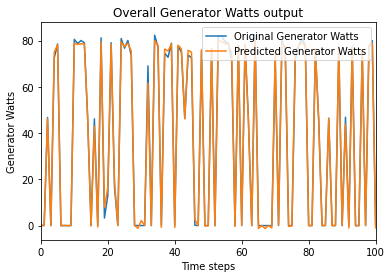

In [16]:
# plot the dataset with the first 100 predicted dataset
plt.plot(TestingData['Generate Watts'],label = 'Original Generator Watts')
plt.plot(TestingData['Predicted Watts'],label = 'Predicted Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.xlim([0, 100])
plt.show()

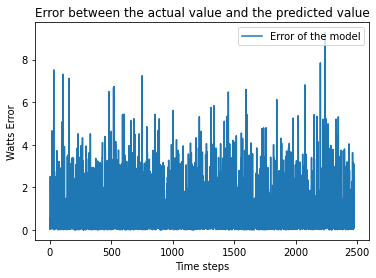

The Average Error: 1.088474810201012


In [17]:
# plot the accuracy of the model
plt.plot(TestingData['Error'],label = 'Error of the model')
plt.title('Error between the actual value and the predicted value')
plt.xlabel('Time steps')
plt.ylabel('Watts Error')
plt.legend(loc = 1)
#plt.xlim([0, 100])
plt.show()
print('The Average Error:', np.mean(Error))

In [18]:
# row['GT1 Compressor Discharge Press Max Select {Avg}'] < 5, item[2]
# and row['GT1 IGV angle in deg {Avg}'] < 35, item[1] < 35, item[1]
predic = list(Predictions)
text_original = PredictorScaler.inverse_transform(X_test)
res = []
for i in range(len(text_original)):
    if text_original[i][2] < 5 and text_original[i][1] < 35:
        res.append(0)
    else:
        res.append(predic[i][0])
Combine_res = np.asarray(res)

In [19]:
# Analysis the Combine model:

TestingData1=pd.DataFrame(data=Test_Data, columns=select_variable)
TestingData1['Generate Watts']=y_test_orig
TestingData1['Predicted Watts']=Combine_res
TestingData1.head()

# Calculate the error between the actual value and the predicted value
Error=abs(TestingData1['Generate Watts']-TestingData1['Predicted Watts'])# Computing the absolute percent error
TestingData1['Error']=Error

# Finding the R^2 of the model
corr_matrix = np.corrcoef(TestingData1['Generate Watts'], TestingData1['Predicted Watts'])
corr = corr_matrix[0,1]
R_sq = corr**2
print('The R^2 of ANN model is:', R_sq)
TestingData1.head()

The R^2 of ANN model is: 0.9980423194726553


,GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},...,Generate Watts,Predicted Watts,Error
0,61.643606,32.315319,-0.478618,...,-0.032427,0.000000,0.032427
1,69.125347,31.995942,0.302327,...,-0.019647,0.000000,0.019647
2,1099.973877,57.896737,112.888217,...,46.707737,46.141888,0.565849
3,72.354564,31.998320,0.024077,...,-0.025003,0.000000,0.025003
4,1054.933006,83.033408,154.429976,...,72.464828,74.971306,2.506478


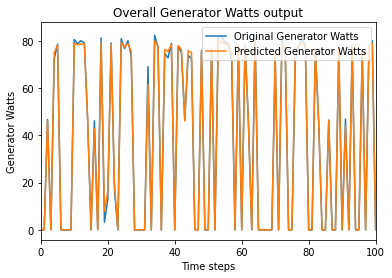

In [20]:
# plot the dataset with the first 100 predicted dataset
plt.plot(TestingData1['Generate Watts'],label = 'Original Generator Watts')
plt.plot(TestingData1['Predicted Watts'],label = 'Predicted Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.xlim([0, 100])
plt.show()

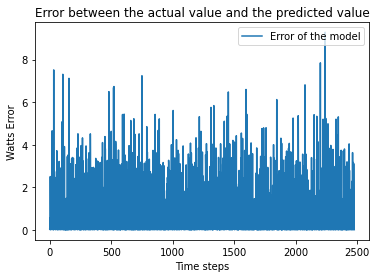

The Average Error: 0.9463337103020106


In [21]:
# plot the accuracy of the model
plt.plot(TestingData1['Error'],label = 'Error of the model')
plt.title('Error between the actual value and the predicted value')
plt.xlabel('Time steps')
plt.ylabel('Watts Error')
plt.legend(loc = 1)
#plt.xlim([0, 100])
plt.show()
print('The Average Error:', np.mean(Error))

In [22]:
# The Average Error decrease a lot 
# From 1.2249424420916317 to 0.6589024247075902
# The R square value also increased from 0.9979149809002641 to 0.9980423194726553
def name():
    return 'Shengbin Wang'
# Reference:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
# https://www.askpython.com/python/coefficient-of-determination
# https://www.bogotobogo.com/python/scikit-learn/Artificial-Neural-Network-ANN-1-Introduction.php
# https://thinkingneuron.com/how-to-find-best-hyperparameters-using-gridsearchcv-in-python/
# https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [38]:
class ANN_model_no():
    def predict(input):
        newadd =[]
        for i in range(len(input)):
            if i != 1:
                newadd.append(input[i])
        xx = newadd
        if xx[2] < 5 and xx[1] < 35:
            return 0
        else:
            a = np.array([xx])
            tem = PredictorScaler.transform(a)
            test1 = model.predict(tem)
            resl = TargetVarScaler.inverse_transform(test1)
            return resl[0][0]

In [39]:
import pickle
pickle.dump(ANN_model_no, open( "annmodel_nonew", "wb" ))